In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import itertools as it
from matplotlib.pyplot import figure
from sympy import *
from sympy.abc import x
import networkx as nx
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
from scipy.io import loadmat
import scipy.linalg as spl
import PIL
from PIL import Image

In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10

# Chapter 04, Matrix Decompositions
## 4.1 Determinant and Trace
### Example 4.1 (Testing for Matrix Invertibility

Recall: A matrix, $A$, is considered "invertible", iff the result of $A\frac{1}{A} = I$. If $A$ is a $1x1$, a scalar, $A$ is only invertible if it is $\neq 0$.

Recall: Given two 2x2's, A, and B, which are constructed as the following. 
$$
A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix};\\ 
B = \begin{bmatrix} a_{22} & -a_{12}  \\ -a_{21} & a_{11}  \end{bmatrix};
$$

*Here, B is known as the adjugate, of A.* The product of A and it's adjugate helps us find it's inverse. 
$$
AB = \begin{bmatrix} a_{11}a_{22} - a_{12}a_{21} & 0  \\ 0 & a_{11}a_{22}-a_{12}a_{21} \end{bmatrix} =  (a_{11}a_{22} - a_{12}a_{21})  I;\\
A = ((a_{11}a_{22} - a_{12}a_{21})  I)\frac{1}{\begin{bmatrix} a_{22} & -a_{12}  \\ -a_{21} & a_{11}  \end{bmatrix}};\\
A^{-1} = \frac{1}{a_{11}a_{22} - a_{12}a_{21}}{\begin{bmatrix} a_{22} & -a_{12}  \\ -a_{21} & a_{11}  \end{bmatrix}}
$$

From here we can see that the inverse can only exist if the $"a_{11}a_{22} - a_{12}a_{21}"$ term is $\neq 0$. The value of this term is called the determinant. 

### Example 4.2 (Determinants as Measures of Volume)
#### Figure 4.2 
*The area of the parallelogram spanned by the vectors **b** and **g** is $|det([b,g])|$.*

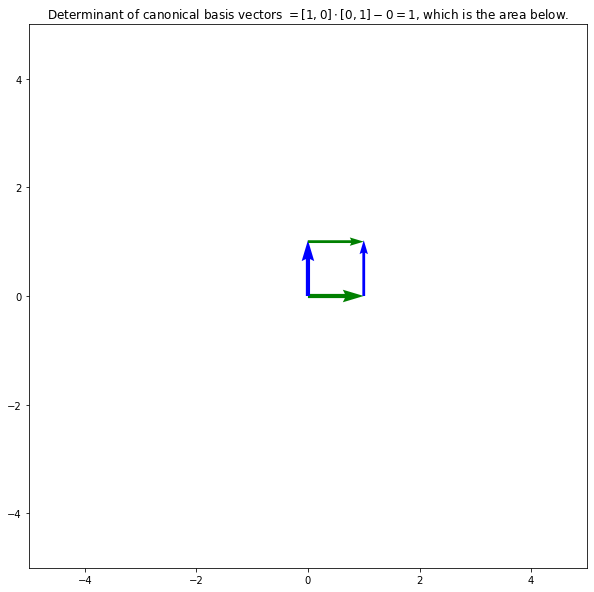

In [3]:
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
g = [1,0]
b = [0,1]
plt.quiver(*origin2D, *g, scale = scale, color = "g")
plt.quiver(*origin2D, *b, scale = scale, color = "b")
plt.quiver(*g, *b, scale = scale, width = .005, color = "b")
plt.quiver(*b, *g, scale = scale, width = .005, color = "g")
plt.title(r"Determinant of canonical basis vectors $= [1,0]\cdot[0,1] - 0 = 1$, which is the area below.");

#### Figure 4.3
*The volume of the paralellepiped spanned by the vectors **r,b,g** is $|det([r,b,g])|$.*

In [4]:
r = np.vstack([2,0])
g = np.vstack([6,1])
A = np.hstack([r,g])               
twoDet = lambda A: A[0][0]*A[1][1] - A[0][1]*A[1][0]# Implementation of "a_{11}a_{22} - a_{12}a_{21}".
twoDet(A)
npl.det(A)

2

2.0

In [5]:
r = np.vstack([2,0,-8])
g = np.vstack([6,1,0])
b = np.vstack([1,4,-1])
A = np.hstack([r,g,b])
Matrix(A)
npl.det(A)

Matrix([
[ 2, 6,  1],
[ 0, 1,  4],
[-8, 0, -1]])

-185.99999999999991

The $\mathbb{R}^3$ determinant can also be calculated with Sarrus' rule, which gives us a template for the determinant of an $n = 3$ matrix.
$$
a_{11}a_{22}a_{33} + a_{21}a_{32}a_{13} + a_{31}a_{12}a_{23} - a_{31} a_{22} a_{13} - a_{11} a_{32} a_{23} - a_{21} a_{12} a_{33}
$$

In [6]:
sarrus = lambda A: A[0][0]*A[1][1]*A[2][2] + A[1][0]*A[2][1]*A[0][2] + A[2][0]*A[0][1]*A[1][2] - A[2][0]*A[1][1]*A[0][2] - A[0][0]*A[2][1]*A[1][2] - A[1][0]*A[0][1]*A[2][2]

In [7]:
sarrus(A)

-186

The sign indicates the orientation of the vectors, and the absolute value of the determinant in $\mathbb{R}^3$ can be considered the volume. 

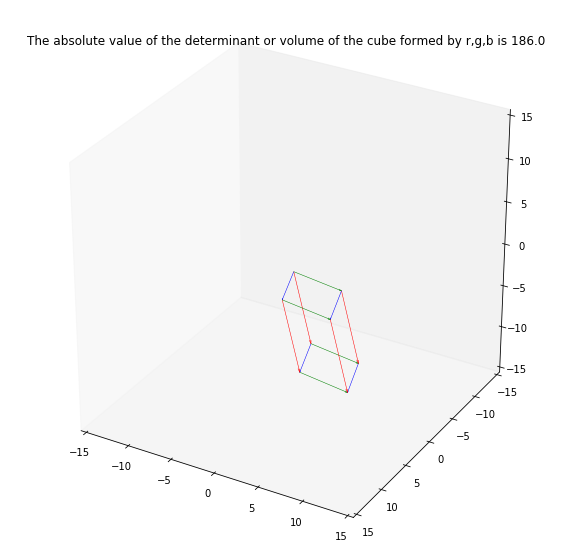

In [8]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection='3d')
scale3D = 15
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
ax.grid(b=None)
ax.set_title("The absolute value of the determinant or volume of the cube formed by r,g,b is %1.1f" %abs(npl.det(A)))
# Figure setup.

# Plotting determinant.
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label="_nolegend_")
c = ["r","g","b"]
ax.quiver(*origin3D, *A[:,0], color = "r", **quiverkey)
ax.quiver(*origin3D, *A[:,1], color = "g", **quiverkey)
ax.quiver(*origin3D, *A[:,2], color = "b", **quiverkey)
for i in [i for i in list(it.product([0,1,2],repeat=2)) if i[0]!=i[1]]: # Iterating through repetitive edges.
    ax.quiver(*A[:,i[0]], *A[:,i[1]], color = c[i[1]], **quiverkey)
ax.quiver(*A[:,1]+A[:,2], *A[:,0], color = "r", **quiverkey)
ax.quiver(*A[:,2]+A[:,0], *A[:,1], color = "g", **quiverkey)
ax.quiver(*A[:,0]+A[:,1], *A[:,2], color = "b", **quiverkey);
# Plotting determinant.

### Example 4.3 (Laplace Expansion)

*We can compose the determinant of an $n\times n$ matrix as the sum of $(n-1)\times(n-1)$ matrices, and by recursively applying "$n - 1$", we can ultimately sum up the determinants of $2 \times 2$ matrices. I.E. iteratively delete rows and columns until you're left with a 2x2 matrix, repeat this n amount of times, deleting the $k^{th}$ row along the way.* 

$$
det(A) = \sum^n_{k=1}a_{jk}(-1)^{k+j}det(A_{j,k}).
$$

In [9]:
A = np.vstack([[1,2,3],[3,1,2],[0,0,1]])
Matrix(A)

Matrix([
[1, 2, 3],
[3, 1, 2],
[0, 0, 1]])

In [10]:
def laplace(matrix):
    '''
    Rough implementation for a 3x3 matrix example. 
    '''
    assert np.shape(matrix)[0] == np.shape(matrix)[1] # Must be a square matrix.
    n = np.shape(matrix)[0]
    j = 0
    sumList = []
    for k in list(range(n)):
        temp = np.delete(A,j,0)
        temp = np.delete(temp,k,1)
        sumList.append(matrix[j][k] * (-1)**(k+j+2) * twoDet(temp)) # Note on the first term: +2 for zero indexing, and parentheses to indicate flipping of sign.
    return sum(sumList),sumList

In [11]:
laplace(A),npl.det(A),sarrus(A)

((-5, [1, -6, 0]), -5.000000000000001, -5)

For generalized methods of calculating the determinant, the principle is that you are calculating the sum of the products of the diagonals of a matrix. This can be done in several ways, Laplace expansion being one, another is the Leibniz method which compresses a matrix into it's permutations and stores results in a single new matrix, and calculates the determinants of parts of this new matrix.

In [12]:
def leibniz(mat,n): 
    '''
    Credit to https://www.geeksforgeeks.org/determinant-of-a-matrix/
    TODO: Implement less efficient, recursive method
    missing in geeksforgeeks for the Laplace, in Python.
    '''
    temp = [0]*n # temporary array for storing row   
    total=1 
    det=1  # initialize result 
  
    # loop for traversing the diagonal elements  
    for i in range(0,n): 
        index=i  # initialize the index 
  
        # finding the index which has non zero value   
        while(mat[index][i] == 0 and index < n): 
            index+=1
     
        if(index == n): # if there is non zero element 
            # the determinat of matrix as zero 
            continue
  
        if(index != i): 
            # loop for swaping the diagonal element row and index row 
            for j in range(0,n): 
                mat[index][j],mat[i][j] = mat[i][j],mat[index][j] 
                  
            # determinant sign changes when we shift rows   
            # go through determinant properties   
            det = det*int(pow(-1,index-i)) 
    
        # storing the values of diagonal row elements  
        for j in range(0,n): 
            temp[j] = mat[i][j] 
           
        #traversing every row below the diagonal element 
        for j in range(i+1,n): 
            num1 = temp[i]     # value of diagonal element 
            num2 = mat[j][i]   # value of next row element 
  
            # traversing every column of row   
            # and multiplying to every row   
            for k in range(0,n): 
                # multiplying to make the diagonal   
                # element and next row element equal 
  
                mat[j][k] = (num1*mat[j][k]) - (num2*temp[k]) 
  
            total = total * num1 # Det(kA)=kDet(A); 
    
    print(mat)
    print(det)
    print(total)
  
    #multiplying the diagonal elements to get determinant 
    for i in range(0,n): 
         det = det*mat[i][i] 
      
    print(mat)
    print(det)
    print(total)
  
    return int(det/total) #Det(kA)/k=Det(A); 

A = np.vstack([[1, 2,5,-3,-2],[2,3,2,3,1],[1, 1,3,-2,0],[1, -1,6,4,0],[1,2,1,1,4]])
Matrix(A)
npl.det(A)

Matrix([
[1,  2, 5, -3, -2],
[2,  3, 2,  3,  1],
[1,  1, 3, -2,  0],
[1, -1, 6,  4,  0],
[1,  2, 1,  1,  4]])

-316.00000000000006

In [13]:
leibniz(A,5)

[[   1    2    5   -3   -2]
 [   0   -1   -8    9    5]
 [   0    0   -6    8    3]
 [   0    0    0   80   -3]
 [   0    0    0    0 1896]]
1
-2880
[[   1    2    5   -3   -2]
 [   0   -1   -8    9    5]
 [   0    0   -6    8    3]
 [   0    0    0   80   -3]
 [   0    0    0    0 1896]]
910080
-2880


-316

## 4.2 Eigenvalues and Eigenvectors 
*$\lambda$ is an eigenvalue, and $x$ is an eigenvector of some matrix $A$, if $\lambda x = Ax$, meaning that $(A-\lambda I)x = 0$, and by definition an eigenvector is $\neq 0$, thus the null space of $A-\lambda I$ contains more than just 0, meaning it is not invertible and it's determinant is 0.*
### Example 4.4 (The Case of the Identity Matrix)
*Provides general eigenvalue example for the identity matrix as it relates to properties of eigenvalues.*
### Example 4.5 (Computing Eigenvalues, Eigenvectors and Eigenspaces)

In [14]:
A = np.vstack([[4,2],[1,3]])
Matrix(A)

Matrix([
[4, 2],
[1, 3]])

In [15]:
x = Symbol('lam')
eigenvalueVec = lambda lam: A-np.vstack([[lam, 0], [0, lam]])
Matrix(A-np.vstack([[x, 0], [0, x]]))

Matrix([
[4 - lam,       2],
[      1, 3 - lam]])

The determinant of the above can be solved using ad-bc, which in the expanded and factorized version of the above case yields $(2-\lambda)(5-\lambda)$, meaning there are two eigenvalues: 2 and 5. To find the eigenvector spaces, we plug in each lambda into both eigenvalue positions and solve homogenous systems of equations.

Recall **Figure 2.3**, the solution space of a system of two linear equations with two variables can be geometrically interpreted as the interesection of two lines. 

For clarity, the numpy eigenvalue algorithm uses numerical methods of approximation. A crude implementation follows. Note that there are increasingly advanced numerical methods of approximation, from power iteration through to using Rayleigh quotients. 

In [16]:
def eValSearch(A, lam, iters):
    iters = 200
    incr = .06
    basis = A
    det0 = abs(npl.det(basis-lam*np.eye(np.shape(basis)[0])))
    lam -= incr
    det1 = abs(npl.det(basis-lam*np.eye(np.shape(basis)[0])))

    detList = []
    for i in range(iters):
        if .0001 > abs(det1) > .001 : 
        # If determinant already ~0, break
            break
        else: 
            if abs(det1)-abs(det0) > .1: 
            # If new determinant is greater than last determinant
                lam +=incr
                det0 = abs(det1)
                det1 = abs(npl.det(basis-lam*np.eye(np.shape(basis)[0])))
                if i<10:
                    print("Lambda: %.5f, Determinant: %.5f" %(lam,det1))
            else:
                lam -=incr
                det0 = abs(det1)
                det1 = abs(npl.det(basis-lam*np.eye(np.shape(basis)[0])))
                if i<10:
                    print("Lambda: %.5f, Determinant: %.5f" %(lam,det1))  

        detList.append(abs(det1))
        if len(detList)>2 and detList[::-1][0] == detList[::-1][2]:
            ''' 
            Detect convergence to reduce pendulum effect.
            Turn off this if statement to view pendulum.
            '''
            incr /= 100
        plt.scatter(i,abs(det1))
        plt.scatter(i,abs(lam))
    plt.title("Final: Lambda: %.3f, Determinant: %.3f" %(lam,det1));
    return lam

Lambda: 9.88000, Determinant: 38.45440
Lambda: 9.82000, Determinant: 37.69240
Lambda: 9.76000, Determinant: 36.93760
Lambda: 9.70000, Determinant: 36.19000
Lambda: 9.64000, Determinant: 35.44960
Lambda: 9.58000, Determinant: 34.71640
Lambda: 9.52000, Determinant: 33.99040
Lambda: 9.46000, Determinant: 33.27160
Lambda: 9.40000, Determinant: 32.56000
Lambda: 9.34000, Determinant: 31.85560


4.89099999999996

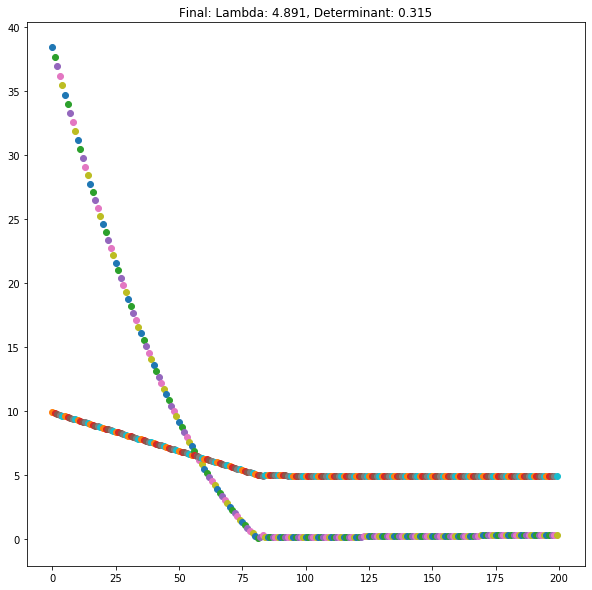

In [17]:
eValSearch(A, lam = 10, iters = 200)

Lambda: 3.88000, Determinant: 2.10560
Lambda: 3.82000, Determinant: 2.14760
Lambda: 3.76000, Determinant: 2.18240
Lambda: 3.70000, Determinant: 2.21000
Lambda: 3.64000, Determinant: 2.23040
Lambda: 3.58000, Determinant: 2.24360
Lambda: 3.52000, Determinant: 2.24960
Lambda: 3.46000, Determinant: 2.24840
Lambda: 3.40000, Determinant: 2.24000
Lambda: 3.34000, Determinant: 2.22440


1.861000000000009

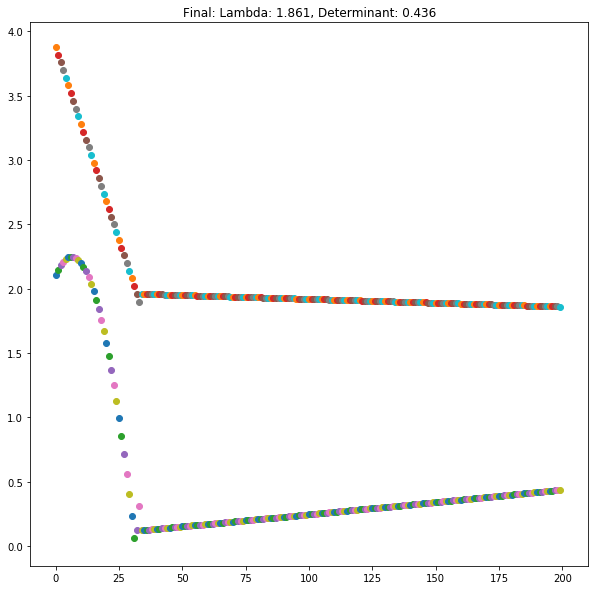

In [18]:
eValSearch(A, lam = 4, iters = 200)

In [19]:
a = npl.eig(A)[1][:,0]
a

array([0.89442719, 0.4472136 ])

In [20]:
b = npl.eig(A)[1][:,1]
b

array([-0.70710678,  0.70710678])

We can visualize the above as spans using the following.

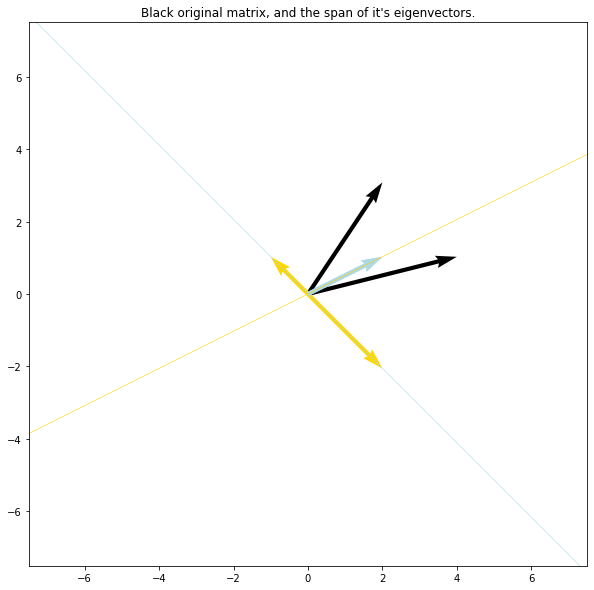

In [25]:
# Figure setup.
scale = 15
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title("Black original matrix, and the span of it's eigenvectors.")
plt.quiver(*origin2D,*A[:,0],scale=scale)
plt.quiver(*origin2D,*A[:,1],scale=scale)
# Figure setup.

# Eigenvectors.
lam1,lam2 = npl.eig(A)[0]
plt.quiver(*origin2D, *eigenvalueVec(lam1)[:,0], scale=scale,color="gold")
plt.quiver(*origin2D, *eigenvalueVec(lam1)[:,1], scale=scale,color="gold")
plt.quiver(*origin2D, *eigenvalueVec(lam2)[:,0], scale=scale,color="lightblue")
plt.quiver(*origin2D, *eigenvalueVec(lam2)[:,1], scale=scale,color="lightblue")
# Eigenvectors.

# Span.
plt.quiver(*origin2D, *a*100, width = .001, scale=scale, color = "gold")
plt.quiver(*origin2D, *a*-100, width = .001, scale=scale, color = "gold")
plt.quiver(*origin2D, *b*100, width = .001, scale=scale, color = "lightblue")
plt.quiver(*origin2D, *b*-100, width = .001, scale=scale, color = "lightblue");
# Span. 

More advanced iteration methods included here for completeness.

In [26]:
def PowerIteration(A, iters, tol = .000001):
    v = np.random.randn(A.shape[0])
    v /= npl.norm(v)
    vList = [v]
    pV = np.zeros(np.shape(A)[0])
    
    while iters > 0 and not np.allclose(v,pV,atol=tol):
        pV = v
        v = np.dot(A,v)
        v /= npl.norm(v)
        vList.append(v)
        iters -= 1

    return v,np.vstack(vList)

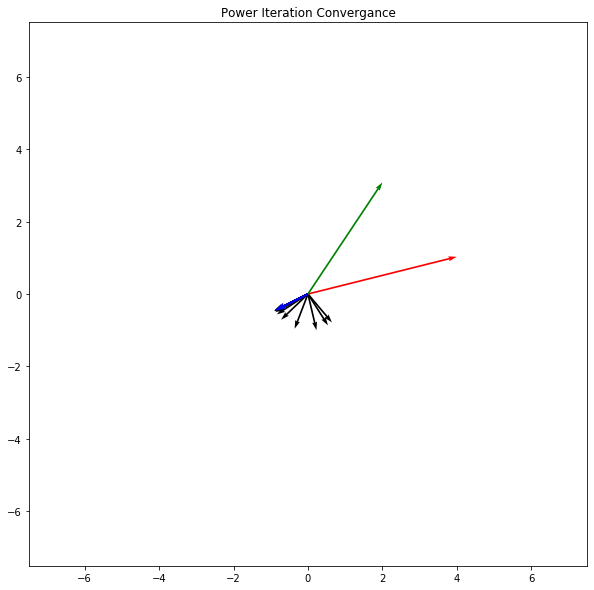

In [27]:
v,vList = PowerIteration(A,20)
scale=15
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
for i in list(range(len(vList))):
    plt.quiver(*origin2D,*vList[i],scale=scale, color = "k", width=.003) #power iters
plt.quiver(*origin2D, *A[:,0],scale=scale,color="r", width=.003) # basis
plt.quiver(*origin2D, *A[:,1],scale=scale,color="g", width=.003) # basis
plt.quiver(*origin2D, *v, scale=scale, color = "b", width=.004) # final iter

plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title("Power Iteration Convergance");

Power iteration is unable to find all eigenvectors, so it's necessary to use some version of an inverse iteration as the following.

In [28]:
import scipy.linalg
def InverseIteration(A, iters, tol = .000001):
    v = np.random.randn(np.shape(A)[0])
    v /= np.linalg.norm(v) 
    vList = [v]

    lu, piv = scipy.linalg.lu_factor(A) # Compute LU factorization of A.
    pV = np.zeros(np.shape(A)[0])
    
    while iters > 0 and not np.allclose(v,pV,atol=tol):
        pV = v
        v = scipy.linalg.lu_solve((lu, piv), v) # Compute A^(-1)v.
        v /= np.linalg.norm(v)
        vList.append(v)
        iters -= 1
    return v,np.vstack(vList)

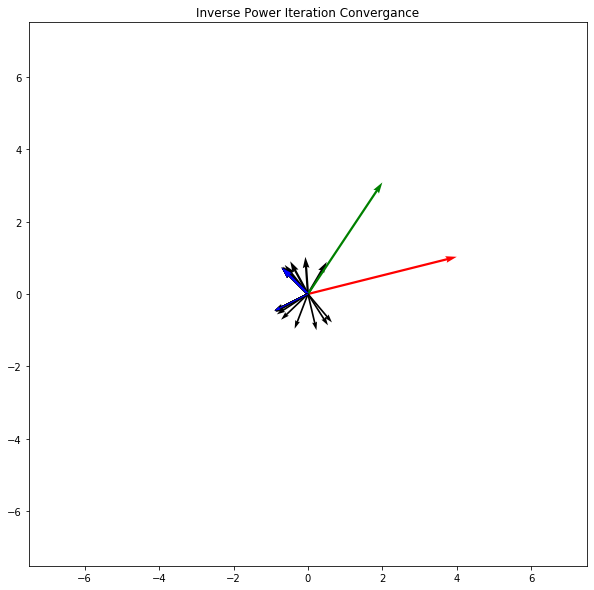

In [29]:
v1,v1List = InverseIteration(A,20)
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
for i in list(range(len(v1List))):
    plt.quiver(*origin2D,*v1List[i],scale=scale, color = "k", width=.004) #power iters
plt.quiver(*origin2D, *A[:,0],scale=scale,color="r", width=.004) # basis
plt.quiver(*origin2D, *A[:,1],scale=scale,color="g", width=.004) # basis
plt.quiver(*origin2D, *v1, scale=scale, color = "b", width=.004) # final iter

# And we can also include our results from power iteration
# for the larger eigenvalue eigenvector 
for i in list(range(len(vList))):
    plt.quiver(*origin2D,*vList[i],scale=scale, color = "k", width=.003) #power iters
plt.quiver(*origin2D, *v, scale=scale, color = "b", width=.002) # final iter

plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title("Inverse Power Iteration Convergance");

### Example 4.6
*Shows the difference between algebraic and geometric multiplicity, in that a matrix may have two repeated eigenvalues that equal a number, but only one distinct unit eigenvector.*

In [30]:
A = np.vstack([[2,1],[0,2]])
npl.eig(A)

(array([2., 2.]), array([[ 1.0000000e+00, -1.0000000e+00],
        [ 0.0000000e+00,  4.4408921e-16]]))

Numpy shows the eigenvalues are 2 and 2, while the eigenvectors are $[1,0],[-1,0]$.

#### Figure 4.4 Determinants and eigenspaces.
*Overview of five linear mappings and their associated transformation matrices $A_i \in \mathbb{R}^{2\times 2}$ projecting 400 color-coded points $x \in \mathbb{R}^2$ (left column) onto target points $A_ix$ (right column). The central column depicts the first eigenvector, stretched by its associated eigenvalue $\lambda_1$, and the second eigenvector stretched by its eigenvalue $\lambda_2$. Each row depicts the effect of one of five transformation matrices $A_i$ with respect to the standard basis.*

In [31]:
# Initializing data.
scale = 7
data = np.linspace(-1,1,20)
original = np.vstack([[i,j] for i in data for j in data])
colors = np.vstack([[i,0,j] for i in np.linspace(0,1,20) for j in np.linspace(1,0,20)])
# Initializing data.

# Applying transformation from book.
A1 = np.vstack([[1/2,0],[0,2]])
a1Eig = npl.eig(A1) 
originalA1 = np.dot(A1, original.T).T
a1 = a1Eig[0] * a1Eig[1]
# Applying transformation from book.

Matrix(original[:3]) # Original matrix.
Matrix(A1) # Transformation matrix.
Matrix(a1Eig[0]) # Transformation eigenvalues.
Matrix(a1Eig[1]) # Transformation eigenvectors.
Matrix(a1) # Eigenvalue and vector plotting.
Matrix(originalA1[:3]) # Transformed matrix.

Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

Matrix([
[0.5, 0.0],
[0.0, 2.0]])

Matrix([
[0.5],
[2.0]])

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

Matrix([
[0.5, 0.0],
[0.0, 2.0]])

Matrix([
[-0.5,              -2.0],
[-0.5, -1.78947368421053],
[-0.5, -1.57894736842105]])

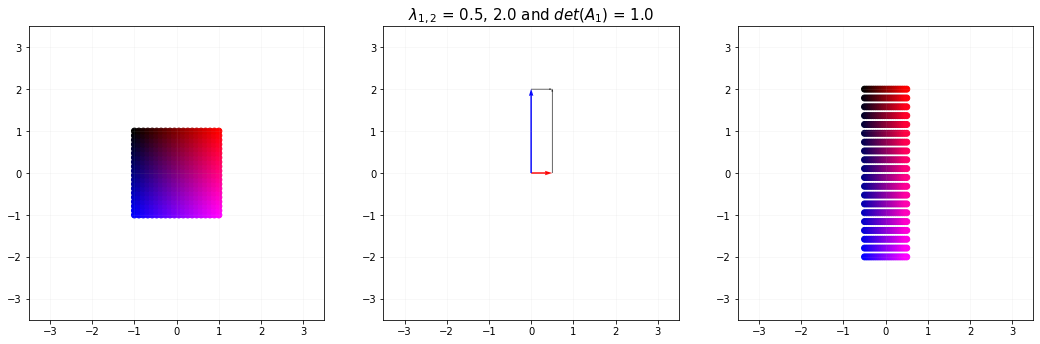

In [32]:
# Figure setup.
fig,a = plt.subplots(1,3, figsize=(18,5.4))
a[0].grid(alpha=.1);a[1].grid(alpha=.1);a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a1Eig[0][0] + " %1.1f" %a1Eig[0][1] + 
               r" and $det(A_1)$ = %1.1f"  %npl.det(A1), size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *a1[:,0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D, *a1[:,1], scale=scale, width=.005, color = "b")
a[1].quiver(*a1[:,1], *a1[:,0], scale=scale, width=.002, color = "k")
a[1].quiver(*a1[:,0], *a1[:,1], scale=scale, width=.002, color = "k")
a[2].scatter(originalA1[:,0], originalA1[:,1], color = colors);
# Transformation.

The horizontal axis is compressed by a factor of $\frac{1}{2}$, the vertical axis is extended by a factor of 2. This mapping is "area preserving" as the determinant is 1.

In [33]:
# Applying transformation from book.
A2 = np.vstack([[1,1/2],[0,1]])
originalA2 = np.dot(A2, original.T).T
a2Eig = npl.eig(A2)
a2 = a2Eig[0] * a2Eig[1]
# Applying transformation from book.

Matrix(original[:3]) # Original matrix.
Matrix(A2) # Transformation matrix.
Matrix(a2Eig[0]) # Transformation eigenvalues.
Matrix(a2Eig[1]) # Transformation eigenvectors.
Matrix(a2) # Eigenvalue and vector plotting.
Matrix(originalA2[:3]) # Transformed matrix.

Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

Matrix([
[1.0, 0.5],
[0.0, 1.0]])

Matrix([
[1.0],
[1.0]])

Matrix([
[1.0,                 -1.0],
[0.0, 4.44089209850063e-16]])

Matrix([
[1.0,                 -1.0],
[0.0, 4.44089209850063e-16]])

Matrix([
[             -1.5,               -1.0],
[-1.44736842105263, -0.894736842105263],
[-1.39473684210526, -0.789473684210526]])

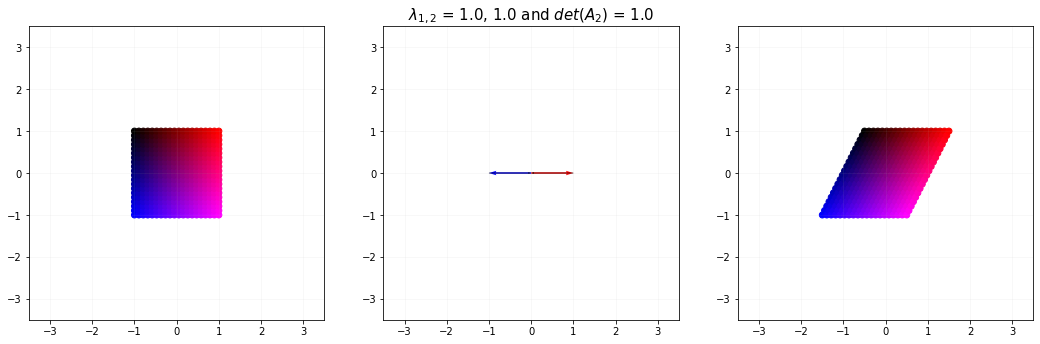

In [34]:
# Figure setup.
fig,a = plt.subplots(1,3, figsize=(18,5.4))
a[0].grid(alpha=.1);a[1].grid(alpha=.1);a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a2Eig[0][0] + " %1.1f" %a2Eig[0][1] + 
               r" and $det(A_2)$ = %1.1f"  %npl.det(A2), size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *a2[:,0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D, *a2[:,1], scale=scale, width=.005, color = "b")
a[1].quiver(*a2[:,1], *a2[:,0], scale=scale, width=.002, color = "k")
a[1].quiver(*a2[:,0], *a2[:,1], scale=scale, width=.002, color = "k")
a[2].scatter(originalA2[:,0], originalA2[:,1], color = colors);
# Transformation.

Shearing along the horizontal axis, this mapping is area preserving as the determinant is 1, and the eigenvectors are collinear indicating the mapping acts only along one direction. 

In [35]:
# Applying transformation from book.
A3 = (1/2)*np.vstack([[np.sqrt(3), -1],[1,np.sqrt(3)]])
originalA3 = np.dot(A3, original.T).T
a3Eig = npl.eig(A3)
a3 = a3Eig[0] * a3Eig[1]
# Applying transformation from book.

Matrix(original[:3]) # Original matrix.
Matrix(A3) # Transformation matrix.
Matrix(a3Eig[0]) # Transformation eigenvalues.
Matrix(a3Eig[1]) # Transformation eigenvector.
Matrix(a3) # Eigenvalue and vector for plotting.
Matrix(originalA3[:3]) # Transformed matrix.

Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

Matrix([
[0.866025403784439,              -0.5],
[              0.5, 0.866025403784439]])

Matrix([
[0.866025403784439 + 0.5*I],
[0.866025403784439 - 0.5*I]])

Matrix([
[-0.707106781186547*I, 0.707106781186547*I],
[  -0.707106781186548,  -0.707106781186548]])

Matrix([
[ 0.353553390593274 - 0.612372435695794*I,  0.353553390593274 + 0.612372435695794*I],
[-0.612372435695795 - 0.353553390593274*I, -0.612372435695795 + 0.353553390593274*I]])

Matrix([
[-0.366025403784439, -1.36602540378444],
[-0.418656982731807, -1.27486483496502],
[-0.471288561679175, -1.18370426614561]])

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


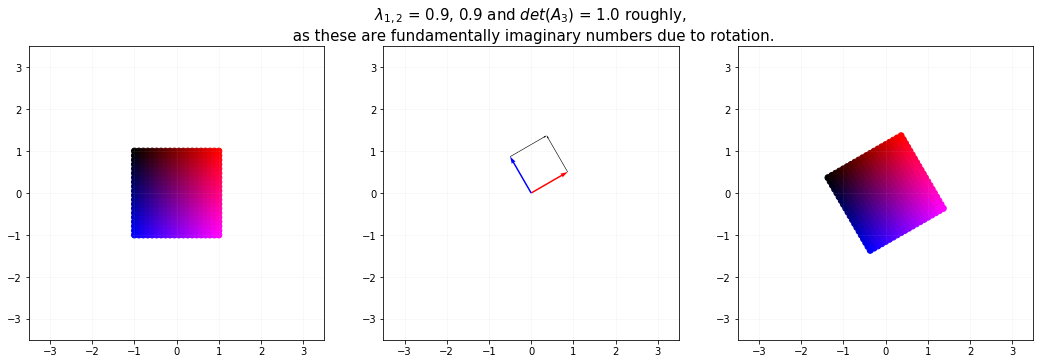

In [36]:
# Figure setup.
fig,a = plt.subplots(1,3, figsize=(18,5.4))
a[0].grid(alpha=.1);a[1].grid(alpha=.1);a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a3Eig[0][0] + " %1.1f" %a3Eig[0][1] + 
               r" and $det(A_3)$ = %1.1f"  %npl.det(A3) + 
               " roughly, \n as these are fundamentally imaginary numbers due to rotation.", size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *A3[:,0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D, *A3[:,1], scale=scale, width=.005, color = "b")
a[1].quiver(*A3[:,1], *A3[:,0], scale=scale, width=.002, color = "k")
a[1].quiver(*A3[:,0], *A3[:,1], scale=scale, width=.002, color = "k")
a[2].scatter(originalA3[:,0], originalA3[:,1], color = colors);
# Transformation.

Rotation by $\frac{\pi}{6}$. Rotations are volume preserving. There are no eigenvectors to draw as this is a rotation, however the rotated matrix is drawn above.

In [37]:
# Applying transformation from book.
A4 = np.vstack([[1,-1],[-1,1]])
originalA4 = np.dot(A4, original.T).T
a4Eig = npl.eig(A4)
a4 = a4Eig[0] * a4Eig[1]
# Applying transformation from book.

Matrix(original[:3]) # Original matrix.
Matrix(A4) # Transformation matrix.
Matrix(a4Eig[0]) # Transformation eigenvalues.
Matrix(a4Eig[1]) # Transformation eigenvector.
Matrix(a4) # Eigenvalue and vector for plotting.
Matrix(originalA4[:3]) # Transformed matrix.

Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

Matrix([
[ 1, -1],
[-1,  1]])

Matrix([
[2.0],
[0.0]])

Matrix([
[ 0.707106781186547, 0.707106781186547],
[-0.707106781186547, 0.707106781186547]])

Matrix([
[ 1.41421356237309, 0.0],
[-1.41421356237309, 0.0]])

Matrix([
[               0.0,               0.0],
[-0.105263157894737, 0.105263157894737],
[-0.210526315789474, 0.210526315789474]])

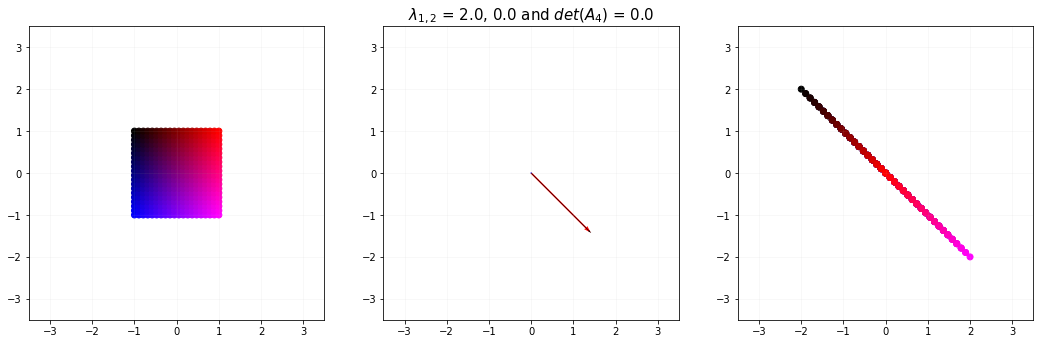

In [38]:
# Figure setup.
fig,a = plt.subplots(1,3, figsize=(18,5.4))
a[0].grid(alpha=.1);a[1].grid(alpha=.1);a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a4Eig[0][0] + " %1.1f" %a4Eig[0][1] + 
               r" and $det(A_4)$ = %1.1f"  %npl.det(A4), size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *a4[:,0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D, *a4[:,1], scale=scale, width=.005, color = "b")
a[1].quiver(*a4[:,1], *a4[:,0], scale=scale, width=.002, color = "k")
a[1].quiver(*a4[:,0], *a4[:,1], scale=scale, width=.002, color = "k")
a[2].scatter(originalA4[:,0], originalA4[:,1], color = colors);
# Transformation.

One eigenvector is collapsed to 0, while the other is stretched to 2. 

In [39]:
# Applying transformation from book.
A5 = np.vstack([[1,1/2],[1/2,1]])
originalA5 = np.dot(A5, original.T).T
a5Eig = npl.eig(A5)
a5 = a5Eig[0] * a5Eig[1]
# Applying transformation from book.

Matrix(original[:3]) # Original matrix.
Matrix(A5) # Transformation matrix.
Matrix(a5Eig[0]) # Transformation eigenvalues.
Matrix(a5Eig[1]) # Transformation eigenvector.
Matrix(a5) # Eigenvalue and vector for plotting.
Matrix(originalA5[:3]) # Transformed matrix.

Matrix([
[-1.0,               -1.0],
[-1.0, -0.894736842105263],
[-1.0, -0.789473684210526]])

Matrix([
[1.0, 0.5],
[0.5, 1.0]])

Matrix([
[1.5],
[0.5]])

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

Matrix([
[1.06066017177982, -0.353553390593274],
[1.06066017177982,  0.353553390593274]])

Matrix([
[             -1.5,              -1.5],
[-1.44736842105263, -1.39473684210526],
[-1.39473684210526, -1.28947368421053]])

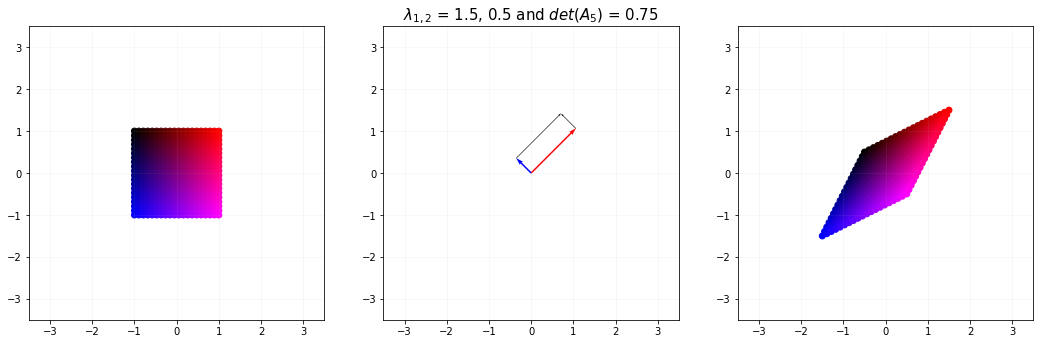

In [40]:
# Figure setup.
fig,a = plt.subplots(1,3, figsize=(18,5.4))
a[0].grid(alpha=.1);a[1].grid(alpha=.1);a[2].grid(alpha=.1);
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
a[0].scatter(original[:,0], original[:,1], color=colors)
a[1].set_title(r"$ \lambda_{1,2}$ = %1.1f," %a5Eig[0][0] + " %1.1f" %a5Eig[0][1] + 
               r" and $det(A_5)$ = %1.2f"  %npl.det(A5), size = 15)
# Figure setup.

# Transformation.
a[1].quiver(*origin2D, *a5[:,0], scale=scale, width=.005, color = "r")
a[1].quiver(*origin2D, *a5[:,1], scale=scale, width=.005, color = "b")
a[1].quiver(*a5[:,1], *a5[:,0], scale=scale, width=.002, color = "k")
a[1].quiver(*a5[:,0], *a5[:,1], scale=scale, width=.002, color = "k")
a[2].scatter(originalA5[:,0], originalA5[:,1], color = colors);
# Transformation.

Shear and stretch that shrinks by .75, stretching by 1.5 and compressing in the orthogonal by .5.

### Example 4.7 (Eigenspectrum of a Biological Neural Network)
#### Figure 4.5
*Caenorhabditis elegans (C. elegans) neural network (not in the sense of NN's in ML, but a biologically neural network, as in, the brain of C. elegans, a worm).*

**SOURCE:** 

*Kaiser M, Hilgetag CC (2006) Non-Optimal Component Placement, but Short Processing Paths, due to Long-Distance Projections in Neural Systems. PLoS Computational Biology 2:e95 (PDF)*

*Kötter R (2004) Online retrieval, processing, and visualization of primate connectivity data from the CoCoMac database. Neuroinformatics 2:127-144.*

*Choe Y, McCormick BH, Koh W (2004) Network connectivity analysis on the temporally augmented C. elegans web: A pilot study. Society of Neuroscience Abstracts 30:921.9.*

Data available at: https://www.dynamic-connectome.org/?page_id=25. To use in this notebook, download both `celegans277.mat` and `celegans277.zip` (unzip it), and place both in the same folder as these notebooks.

In [41]:
annots = loadmat('celegans277.mat')
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'celegans277matrix', 'celegans277positions', 'celegans277labels'])

In [42]:
annots.keys()
type(annots['celegans277positions']),annots['celegans277positions'].shape
type(annots['celegans277positions'][0][0]),annots['celegans277positions'][0][0].shape
annots['celegans277positions'][:5]

dict_keys(['__header__', '__version__', '__globals__', 'celegans277matrix', 'celegans277positions', 'celegans277labels'])

(numpy.ndarray, (277, 2))

(numpy.float64, ())

array([[ 0.01106777,  0.00590281],
       [ 0.01420642,  0.00220444],
       [ 0.01623273,  0.00565686],
       [ 0.01494123,  0.00930765],
       [ 0.08239339, -0.0009838 ]])

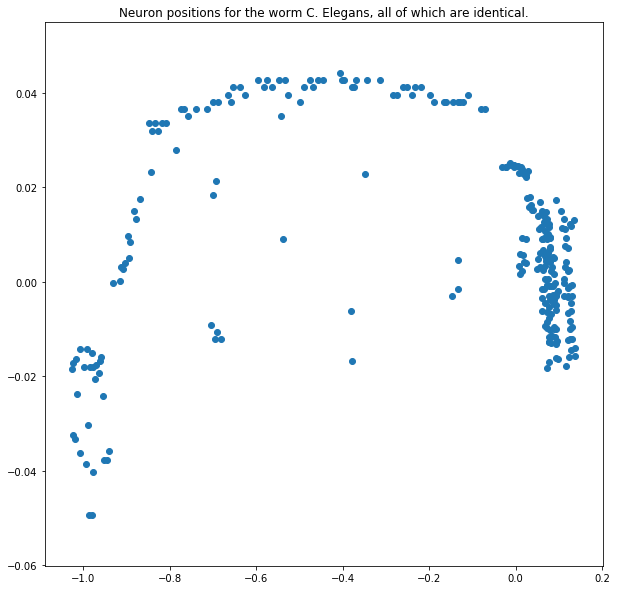

In [43]:
plt.scatter(annots['celegans277positions'][:,0],annots['celegans277positions'][:,1])
plt.title("Neuron positions for the worm C. Elegans, all of which are identical.");

In [44]:
type(annots['celegans277matrix']),annots['celegans277matrix'].shape
type(annots['celegans277matrix'][0][0]),annots['celegans277matrix'][0][0].shape
annots['celegans277matrix'][:5]

(numpy.ndarray, (277, 277))

(numpy.uint8, ())

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

/Users/vb/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


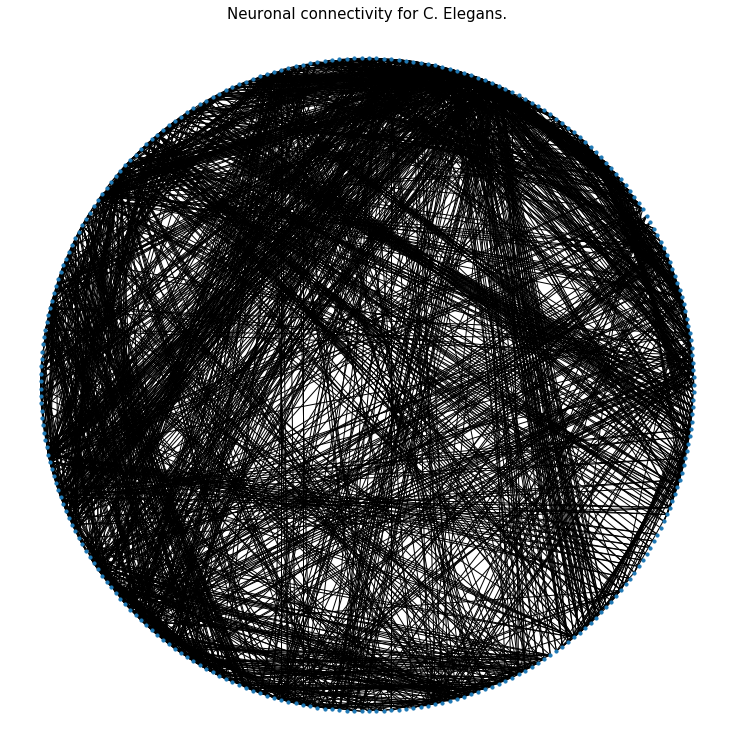

In [45]:
adjacency_matrix = nx.from_numpy_array(annots['celegans277matrix'])
adj = nx.adjacency_matrix(adjacency_matrix)
G = nx.from_scipy_sparse_matrix(adj)
nx.draw_circular(G, node_size=10)
plt.title("Neuronal connectivity for C. Elegans.", size = 15);

Alternatively, we can plot the approach the book provides.

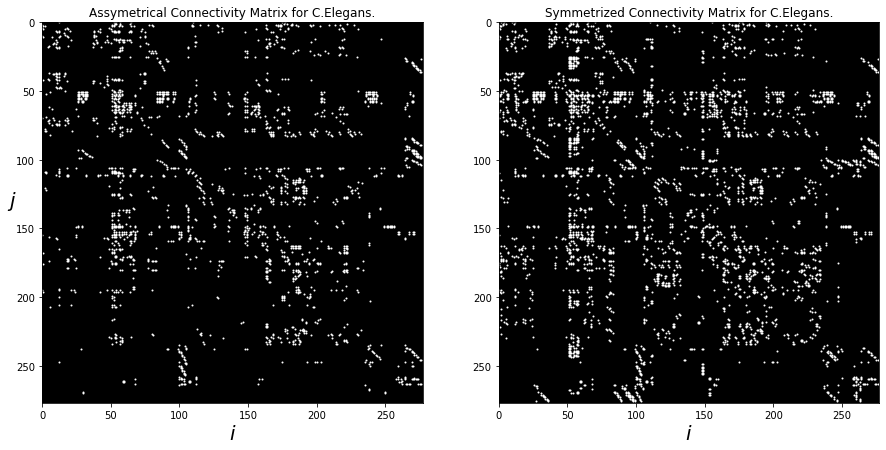

In [46]:
fig,a = plt.subplots(1,2, figsize=(15,7))
a[0].set_facecolor((0,0,0))
a[1].set_facecolor((0,0,0))

Aorig = annots['celegans277matrix']
size = np.shape(Aorig)[0]
A = [[i,j] if Aorig[i][j] == 1 else None for i,v in enumerate(Aorig) for j,w in enumerate(Aorig)]
A = np.vstack([i for i in A if i != None])
a[0].axis([0,277,277,0])
a[0].scatter(A[:,0],A[:,1],s=1, color="white")
a[0].set_title("Assymetrical Connectivity Matrix for C.Elegans.")
a[0].set_xlabel(r"$i$", size = 20)
a[0].set_ylabel(r"$j$", size = 20,rotation=0)

AsymOrig = annots['celegans277matrix']+annots['celegans277matrix'].T
Asym = [[i,j] if AsymOrig[i][j] == 1 else None for i,v in enumerate(AsymOrig) for j,w in enumerate(AsymOrig)]
Asym = np.vstack([i for i in Asym if i != None])
a[1].axis([0,277,277,0])
a[1].scatter(Asym[:,0],Asym[:,1],s=1, color="white")
a[1].set_title("Symmetrized Connectivity Matrix for C.Elegans.")
a[1].set_xlabel(r"$i$", size = 20);

A dot is plotted in the case that a neuron of index $i$ commmunicates with a neuron with index $j$. A symmetrical version is constructed to deal with non-real-valued eigenvalues.

In [47]:
eigs0 = np.array(list(enumerate(np.sort(npl.eig(Aorig)[0])[::-1])))
eigs1 = np.array(list(enumerate(np.sort(npl.eig(AsymOrig)[0])[::-1])))
eigs0[:5]
eigs1[:5]

array([[0.        +0.j        , 9.05622262+0.j        ],
       [1.        +0.j        , 5.43757152+0.j        ],
       [2.        +0.j        , 5.31063534+0.j        ],
       [3.        +0.j        , 3.71539239+0.35632489j],
       [4.        +0.j        , 3.71539239-0.35632489j]])

array([[ 0.        +0.j, 26.03067461+0.j],
       [ 1.        +0.j, 16.19879235+0.j],
       [ 2.        +0.j, 12.91359693+0.j],
       [ 3.        +0.j, 10.83395902+0.j],
       [ 4.        +0.j, 10.62820575+0.j]])

/Users/vb/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


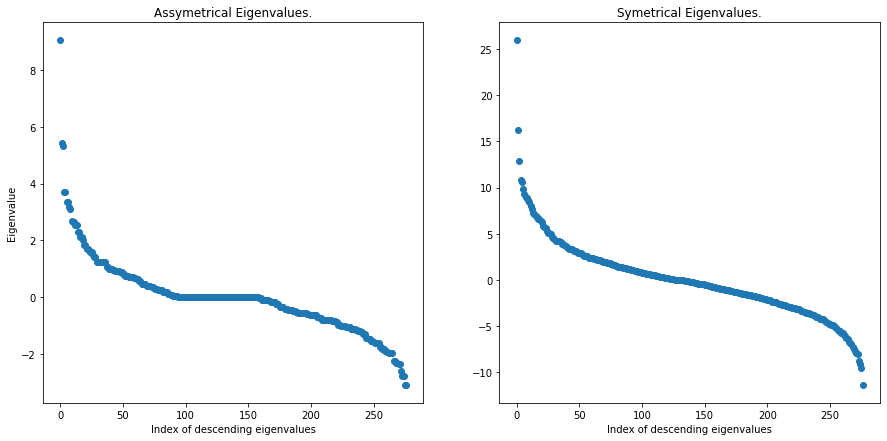

In [48]:
fig,a = plt.subplots(1,2, figsize=(15,7))
a[0].scatter(eigs0[:,0],eigs0[:,1])
a[0].set_title("Assymetrical Eigenvalues.")
a[0].set_xlabel("Index of descending eigenvalues")
a[0].set_ylabel("Eigenvalue")
a[1].scatter(eigs1[:,0],eigs1[:,1])
a[1].set_title("Symetrical Eigenvalues.")
a[1].set_xlabel("Index of descending eigenvalues");

### Example 4.8

In [49]:
A = np.vstack([[3,2,2],[2,3,2],[2,2,3]])
Matrix(A)

Matrix([
[3, 2, 2],
[2, 3, 2],
[2, 2, 3]])

In [50]:
Matrix(A) - Matrix(np.eye(3)*x)

Matrix([
[3 - 1.0*lam,           2,           2],
[          2, 3 - 1.0*lam,           2],
[          2,           2, 3 - 1.0*lam]])

The above is solveable using determinant solving methods and creating minors. As the book notes, the characteristic polynomial is $-(\lambda-1)^2(\lambda-7)$.

In [51]:
eigs = npl.eig(A)[0]
eigs

array([1., 7., 1.])

In [52]:
A1 = A - np.eye(3)*eigs[0]
A2 = A - np.eye(3)*eigs[1]
A3 = A - np.eye(3)*eigs[2]
Matrix(A1)
Matrix(A2)
Matrix(A3)

Matrix([
[2.0, 2.0, 2.0],
[2.0, 2.0, 2.0],
[2.0, 2.0, 2.0]])

Matrix([
[-4.0,  2.0,  2.0],
[ 2.0, -4.0,  2.0],
[ 2.0,  2.0, -4.0]])

Matrix([
[2.0, 2.0, 2.0],
[2.0, 2.0, 2.0],
[2.0, 2.0, 2.0]])

For precision in this case, it's best to use symbolical methods such as those in SymPy to discover eigenvectors, as the numerical methods numpy uses will inherently be approximate.

In [53]:
eigVects = np.hstack([np.array(Matrix(A).eigenvects()[0][2]).astype(np.float64).T,np.array(Matrix(A).eigenvects()[1][2]).astype(np.float64).T])
eigVects
npl.eig(A)[1] # These are normalized and in lambdas: 1,7,1 order, whereas the SymPy result is 1,1,7.

array([[-1., -1.,  1.],
       [ 1.,  0.,  1.],
       [ 0.,  1.,  1.]])

array([[-0.81649658,  0.57735027, -0.27546855],
       [ 0.40824829,  0.57735027, -0.52791413],
       [ 0.40824829,  0.57735027,  0.80338269]])

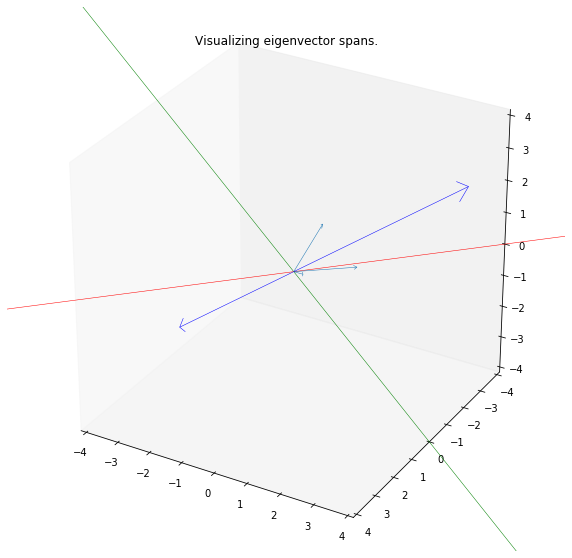

In [54]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection='3d')
scale3D = 4
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
ax.grid(b=None)
# Figure setup.

# Plotting initial matrix.
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label="_nolegend_")
plt.quiver(*origin3D,*A[:,0],**quiverkey)
plt.quiver(*origin3D,*A[:,1],**quiverkey)
plt.quiver(*origin3D,*A[:,2],**quiverkey)
# Plotting initial matrix.

# Plotting eigenvector spans.
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label="_nolegend_")
plt.quiver(*origin3D,*eigVects[:,0]*10, color = "r", **quiverkey)
plt.quiver(*origin3D,*eigVects[:,1]*10, color = "g", **quiverkey)
plt.quiver(*origin3D,*eigVects[:,2]*10, color = "b", **quiverkey)
plt.quiver(*origin3D,*-eigVects[:,0]*10, color = "r", **quiverkey)
plt.quiver(*origin3D,*-eigVects[:,1]*10, color = "g", **quiverkey)
plt.quiver(*origin3D,*-eigVects[:,2]*10, color = "b", **quiverkey)
# Plotting eigenvector spans.

plt.title("Visualizing eigenvector spans.");

As the book states, the red and green vectors are not orthogonal to one another, but we can find an orthogonal basis using Gram Schmidt orthogonalization, which was outlined in **Example 3.12**. 

"In the event that we were given a bases and simply wanted to find the orthogonal version, we could do the following.

1. Set the first orthogonal vector as the first basis vector. $u_1 = b_1$.
2. Project the second basis onto the new vector. $p = \frac{u_1 u_1^T}{||u_1||^2}b_2$.
3. Subtract the projection from the second basis, to find the second orthogonal vector. $u_2 = b_2 - p$."

In [55]:
eigVects

array([[-1., -1.,  1.],
       [ 1.,  0.,  1.],
       [ 0.,  1.,  1.]])

Thus, we are looking for an orthogonalized version of the above. 

In [56]:
def gram_schmidt(a, tol=1e-10): 
    '''
    Converted Julia code for the Gram-Schmidt process 
    from VMLS by Boyd and Vandenberghe.
    '''
    q = []
    for i in range(len(a)):
        qtilde = a[i]
        for j in range(i):
            qtilde = qtilde - np.inner(q[j],a[i])*q[j]
        if npl.norm(qtilde) < tol: # Linear dependence means we can't find a Q.
            print("Vectors linearly dependent")
        q.append(qtilde/npl.norm(qtilde))
    return np.vstack(q).T

gseigVects = gram_schmidt(eigVects.T) # *Orthonormalized.

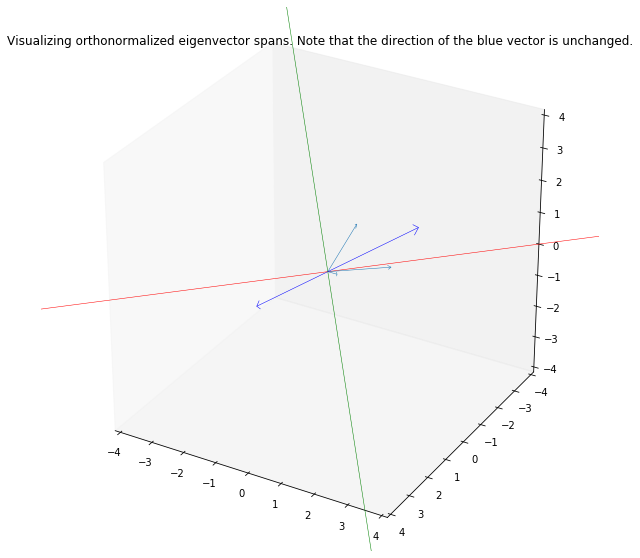

In [57]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection='3d')
scale3D = 4
ax.set_xlim3d(-scale3D,scale3D)
ax.set_ylim3d(scale3D,-scale3D)
ax.set_zlim3d(-scale3D,scale3D)
ax.grid(b=None)
# Figure setup.

# Plotting initial matrix.
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label="_nolegend_")
plt.quiver(*origin3D,*A[:,0],**quiverkey)
plt.quiver(*origin3D,*A[:,1],**quiverkey)
plt.quiver(*origin3D,*A[:,2],**quiverkey)
# Plotting initial matrix.

# Plotting eigenvector spans.
quiverkey = dict(linewidths = .5, arrow_length_ratio = .05, label="_nolegend_")
plt.quiver(*origin3D,*gseigVects[:,0]*10, color = "r", **quiverkey)
plt.quiver(*origin3D,*gseigVects[:,1]*10, color = "g", **quiverkey)
plt.quiver(*origin3D,*gseigVects[:,2]*10, color = "b", **quiverkey)
plt.quiver(*origin3D,*-gseigVects[:,0]*10, color = "r", **quiverkey)
plt.quiver(*origin3D,*-gseigVects[:,1]*10, color = "g", **quiverkey)
plt.quiver(*origin3D,*-gseigVects[:,2]*10, color = "b", **quiverkey)
# Plotting eigenvector spans.

plt.title("Visualizing orthonormalized eigenvector spans. Note that the direction of the blue vector is unchanged.");

#### Figure 4.6
*Geometric intepretation of eigenvalues.*

In [58]:
A = np.vstack([[1,0],[0,1]]) # A is an orthonormal basis of R^2, 
                             # so it's column vectors are orthogonal and it's area is 1.
Matrix(A)

Matrix([
[1, 0],
[0, 1]])

The trace, or sum of the diagonal values in a matrix, is equal to the sum of the eigenvalues. 

In [59]:
lam1,lam2 = npl.eig(A)[0]
lam1+lam2
np.trace(A)

2.0

2

The determinant, or the area a set of vectors takes up, is equal to the product of the eigenvalues.

In [60]:
lam1*lam2
npl.det(A)

1.0

1.0

A, has two eigenvectors which are linearly independent and are also an orthonormal basis.

In [61]:
x1 = np.vstack(npl.eig(A)[1][:,0])
x2 = np.vstack(npl.eig(A)[1][:,1])
np.hstack([x1,x2])

array([[1., 0.],
       [0., 1.]])

Consider any transformation matrix, $A_1$.

In [62]:
A = np.vstack([[2,0],[0,.5]])
lam1,lam2 = npl.eig(A)[0]
lam1,lam2
Matrix(A)

(2.0, 0.5)

Matrix([
[2.0, 0.0],
[0.0, 0.5]])

In [63]:
A@x1
lam1*x1
v1 = lam1*x1

array([[2.],
       [0.]])

array([[2.],
       [0.]])

In [64]:
A@x2
lam2*x2
v2 = lam2*x2

array([[0. ],
       [0.5]])

array([[0. ],
       [0.5]])

In the above we've mapped the original eigenvectors, with A, to create new vectors scaled by the eigenvalues of A. The sum of the absolute values of the eigenvalues tells us how the circumference of the squares changes under the transformation matrix A. 

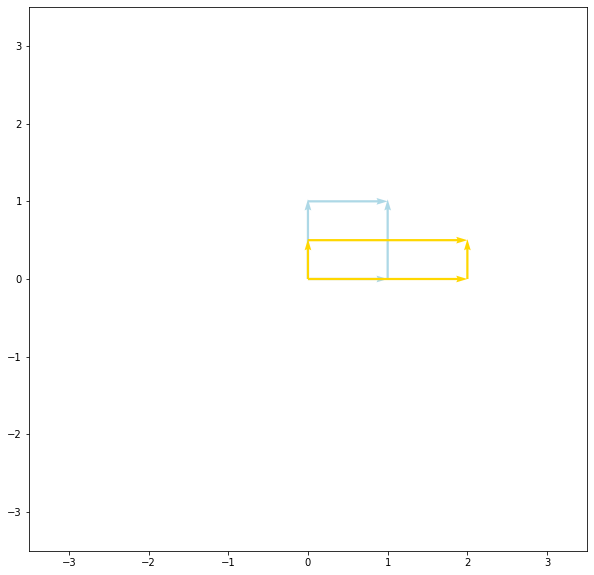

In [65]:
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.quiver(*origin2D,*x1,scale=scale, color = "lightblue", width=.004)
plt.quiver(*origin2D,*x2,scale=scale, color = "lightblue", width=.004)
plt.quiver(*x1,*x2,scale=scale, color = "lightblue", width=.004)
plt.quiver(*x2,*x1,scale=scale, color = "lightblue", width=.004)
plt.quiver(*v1,*v2,scale=scale, color = "gold", width=.004)
plt.quiver(*v2,*v1,scale=scale, color = "gold", width=.004)
plt.quiver(*origin2D,*v1,scale=scale, color = "gold", width=.004)
plt.quiver(*origin2D,*v2,scale=scale, color = "gold", width=.004);

The original matrix, it's area, and circumference were the following.

In [66]:
orig = np.hstack([x1,x2])
Matrix(orig)
npl.det(orig)
np.trace(orig)*2 # *2 because we used 2 vectors to represent an area in R^2.

Matrix([
[1.0, 0.0],
[0.0, 1.0]])

1.0

4.0

The transformation applied was:

In [67]:
Matrix(A)

Matrix([
[2.0, 0.0],
[0.0, 0.5]])

The new vectors have an area and circumference of the following.

In [68]:
lam1*lam2
(lam1+lam2)*2

1.0

5.0

### Example 4.9 (Google's PageRank - Webpages as Eigenvectors)
*The book provides a brief summary of the implementation of PageRank as it relates to matrices.*
## 4.3 Cholesky Decomposition
*Equivalent to taking the square root of a number, where the requirements on what can be rooted also apply.*

If a matrix is symmetric, positive definite, it can be factorized into the product of a lower triangular matrix with positive diagonal elements, and the transpose of that lower triangular matrix. 

### Example 4.10 (Cholesky Factorization)

In [69]:
A = np.vstack([[3,2,2],[2,3,2],[2,2,3]])
Matrix(A)

Matrix([
[3, 2, 2],
[2, 3, 2],
[2, 2, 3]])

In [70]:
npl.cholesky(A)
npl.cholesky(A)@npl.cholesky(A).T

array([[1.73205081, 0.        , 0.        ],
       [1.15470054, 1.29099445, 0.        ],
       [1.15470054, 0.51639778, 1.18321596]])

array([[3., 2., 2.],
       [2., 3., 2.],
       [2., 2., 3.]])

The Cholesky decomposition is useful because, in the event that you do have a matrix that is symmetric and positive definite, you only need it's lower triangular Cholesky factor to reconstruct it. This is opposed to having to store both a lower and upper, as in LU decomposition.

In [71]:
spl.lu(A)[1]
spl.lu(A)[2]
spl.lu(A)[1]@spl.lu(A)[2]

array([[1.        , 0.        , 0.        ],
       [0.66666667, 1.        , 0.        ],
       [0.66666667, 0.4       , 1.        ]])

array([[3.        , 2.        , 2.        ],
       [0.        , 1.66666667, 0.66666667],
       [0.        , 0.        , 1.4       ]])

array([[3., 2., 2.],
       [2., 3., 2.],
       [2., 2., 3.]])

For a 3x3 Cholesky works as the following.

In [72]:
def Cholesky3(A):
    l11 = np.sqrt(A[0][0]) # First diagonal is sqrt of first diagonal value in matrix.
    
    l21 = A[1][0]/l11 
    l22 = np.sqrt(A[1][1]-l21**2) # Second diagonal is sqrt of 
                                  # (second diagonal value minus the squared first value in the second row).
    
    l31 = A[2][0]/l11
    l32 = (A[2][1]-l31*l21)/l22
    l33 = np.sqrt(A[2][2]-(l31**2+l32**2)) # Pattern continued.
    
    return np.vstack([[l11,0,0],[l21,l22,0],[l31,l32,l33]]) 

In [73]:
chA = Cholesky3(A)
chA
chA@chA.T

array([[1.73205081, 0.        , 0.        ],
       [1.15470054, 1.29099445, 0.        ],
       [1.15470054, 0.51639778, 1.18321596]])

array([[3., 2., 2.],
       [2., 3., 2.],
       [2., 2., 3.]])

## 4.4 Eigendecomposition and Diagonalization
#### Figure 4.7 
*Intuition behind the eigendecomposition as sequential transformations.* 

Some selected notes from this section.
1. A symmetric matrix is a square matrix that is equal to it's transpose.
1. A diagonal matrix is a matrix with zeroes in all off diagonal positions.
1. A matrix '$A$' can be decomposed into $P$ and $D$, $D$ is a diagonal matrix that is $= P^{-1}AP$; and P is invertible.
1. 'A' is a linear mapping. We are looking for another way of expressing the same linear mapping, but in another basis. 
1. If there exists an invertible matrix $P$, s.t. $D=P^{-1}AP$, we can say that '$A$' is 'diagonalizable. 
1. If a matrix is symmetric, we can say $D = PAP^{-1}$.
1. In SymPy, `Matrix(A).is_diagonalizable()`.
1. In numpy, `eigh` is strictly for symmetric matrices. 

In [74]:
# Rotation mappings for creating a circle and rotation of basis.
theta = lambda deg: deg*(np.pi/180)
fn = lambda theta: np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta),np.cos(theta)]])
# Rotation mappings for creating a circle and rotation of basis.

ang = 30
basis = np.vstack([[1,0],[0,1]])
tempScale = np.vstack([[2,0],[0,.5]])

# Decomposition.
A = fn(theta(ang))@tempScale
Matrix(A)
Matrix(A).is_diagonalizable() # See Matrix(np.vstack([[3,1],[0,3]])).is_diagonalizable() to see a 'False' result.
npl.eig(A)
P = npl.eig(A)[1] 
D = (np.eye(2)*np.vstack(npl.eig(A)[0]))
Pinv = npl.inv(P)
Matrix(P)
Matrix(D)
Matrix(Pinv)
# Decomposition.

# Checking angle between eigenvectors
cosAngle = lambda x, y: (np.dot(x.T,y)/np.sqrt(np.dot(np.dot(x.T,x),np.dot(y.T,y))))[0][0] 
angle = lambda cos: np.arccos(cos)*(180/np.pi)
angle(cosAngle(np.vstack(P[:,0]),np.vstack(P[:,1])))
# Checking angle between eigenvectors

# Identities.
Matrix(P@D@Pinv)
Matrix(Pinv@A@P)

Matrix([
[1.73205080756888,             -0.25],
[             1.0, 0.433012701892219]])

True

(array([1.49710985, 0.66795366]), array([[0.72871355, 0.22871355],
        [0.68481863, 0.97349376]]))

Matrix([
[0.728713553878169, 0.228713553878169],
[0.684818630291443, 0.973493764886256]])

Matrix([
[1.49710985352497,               0.0],
[             0.0, 0.667953655936123]])

Matrix([
[ 1.76111648393355, -0.413758386917793],
[-1.23888351606645,   1.31829242065108]])

33.557309761920735

Matrix([
[1.73205080756888,             -0.25],
[             1.0, 0.433012701892219]])

Matrix([
[     1.49710985352497, -1.11022302462516e-16],
[-2.22044604925031e-16,     0.667953655936123]])

The last two of the above are the identities $D = P^{-1}AP$ and $A = PDP^{-1}$. **Figure 4.7** shows the various applications between $A,P,D$. 

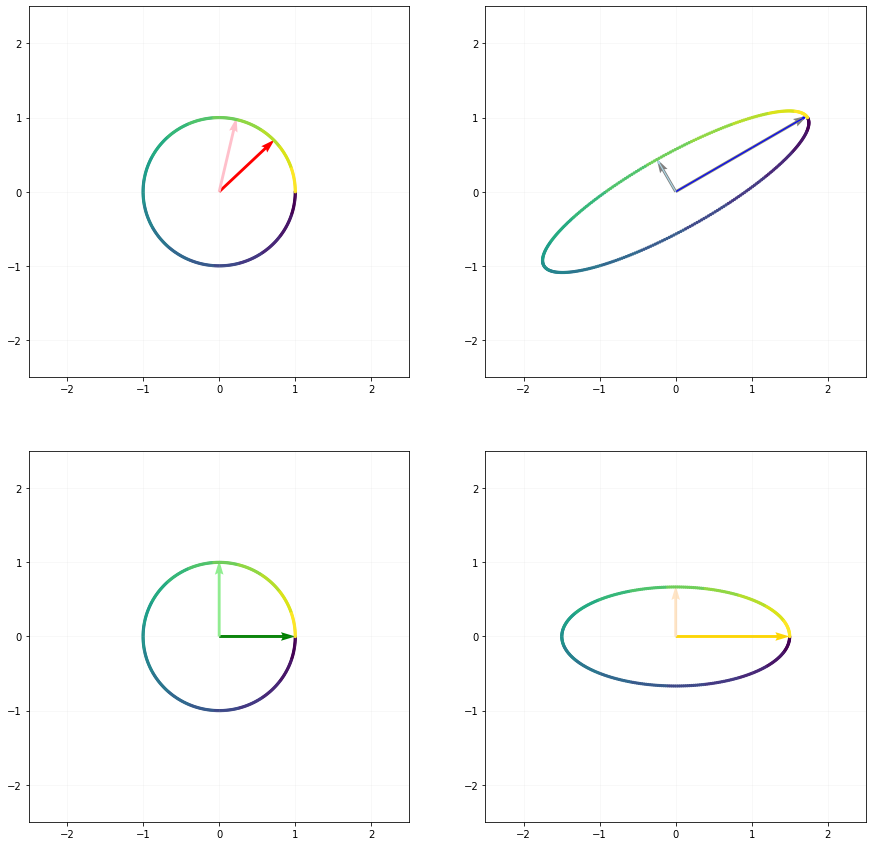

In [75]:
# Figure setup.
fig,a = plt.subplots(2,2, figsize=(15,15))
scale = 5
a[0][0].grid(alpha=.1);a[0][1].grid(alpha=.1);a[1][0].grid(alpha=.1);a[1][1].grid(alpha=.1) # Enable grid.
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2))
colors = np.vstack([[i,0,j] for i in np.linspace(0,1,19) for j in np.linspace(1,0,19)])
# Figure setup.

a[0][0].quiver(*origin2D, *P[:,0],scale=scale,color="r")
a[0][0].quiver(*origin2D, *P[:,1],scale=scale,color="pink")
circle = np.vstack([basis[:,0]@fn(theta(i)) for i in list(range(0,361,1))]) 
a[0][0].scatter(circle[:,0],circle[:,1], s=scale,c=colors[:,0])

a[0][1].quiver(*origin2D, *A[:,0],scale=scale,color="grey")
a[0][1].quiver(*origin2D, *A[:,1],scale=scale,color="grey")
a[0][1].quiver(*origin2D, *P@D@Pinv[:,0],scale=scale,color="b", width=.003)
a[0][1].quiver(*origin2D, *P@D@Pinv[:,1],scale=scale,color="lightblue", width=.003)
circle = np.vstack([basis[:,0]@fn(theta(i)) for i in list(range(0,361,1))])@tempScale@fn(theta(-ang)) #@D@P 
a[0][1].scatter(circle[:,0],circle[:,1], s=scale,c=colors[:,0])


a[1][0].quiver(*origin2D, *P@Pinv[:,0],scale=scale,color="g")
a[1][0].quiver(*origin2D, *P@Pinv[:,1],scale=scale,color="lightgreen")
circle = np.vstack([basis[:,0]@fn(theta(i)) for i in list(range(0,361,1))])
a[1][0].scatter(circle[:,0],circle[:,1], s=scale,c=colors[:,0])

a[1][1].quiver(*origin2D, *P@Pinv@D[:,0],scale=scale,color="gold")
a[1][1].quiver(*origin2D, *P@Pinv@D[:,1],scale=scale,color="bisque")
circle = np.vstack([basis[:,0]@fn(theta(i)) for i in list(range(0,361,1))])@D
a[1][1].scatter(circle[:,0],circle[:,1], s=scale,c=colors[:,0]);

### Example 4.11 (Eigendecomposition)
We are looking to perform an eigendecomposition on the matrix, A.

In [76]:
A = np.vstack([[2,1],[1,2]])
Matrix(A) 

Matrix([
[2, 1],
[1, 2]])

In [77]:
npl.eig(A) # The eigenvalues and eigenvectors, as performed by NumPy.

(array([3., 1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [78]:
P = npl.eig(A)[1].T # Transposed because the book chooses the inverse order for eigenvalues. 
Matrix(P)

Matrix([
[ 0.707106781186547, 0.707106781186547],
[-0.707106781186547, 0.707106781186547]])

In [79]:
D = npl.inv(P)@A@P
Matrix(D)

Matrix([
[1.0, 0.0],
[0.0, 3.0]])

In [80]:
Matrix(A)
Matrix(P@D@npl.inv(P))

Matrix([
[2, 1],
[1, 2]])

Matrix([
[2.0, 1.0],
[1.0, 2.0]])

Additionally, the identities above indicate that the determinant can also be decomposed.

In [81]:
npl.det(A)
npl.det(P@D@npl.inv(P))
npl.det(P)*npl.det(D)*npl.det(npl.inv(P))
npl.det(D)

2.9999999999999996

2.9999999999999996

2.9999999999999996

3.0000000000000004

## 4.5 Singular Value Decomposition
1. $A$ = $U\Sigma V$.
1. $A$ is $m\times n$.
1. $U$ is $m\times m$.
1. $\Sigma$ is $m\times n$.
1. $V$ is $n\times n$.
1. $\Sigma$ has diagonal entries which are called the 'singular values', these are ordered from greatest to least, top left to bottom right.
1. If $m>n$, up to n are the singular values, the rows after n are padded with zeros, and vice versa if $m<n$.
1. This can be applied to any matrix.

#### Figure 4.8
*The book provides the same figure as 4.7, with variable letters mapped to SVD, and the left column overlayed as $R^3$, to emphasize that SVD can map from $R^2$ to $R^3$ in some scenarios.*

### Example 4.12 (Vectors and the SVD)
#### Figure 4.9 
SVD and mapping of vectors (represented by discs). The panels follow the same anti-clockwise structure of Figure 4.8.

In [82]:
U = np.vstack([[-.79,0,-.62],[.38,-.78,-.49],[-.48,-.62,.62]])
S = np.vstack([[1.62,0],[0,1.0],[0,0]])
V = np.vstack([[-.78,-.62],[.62,-.78]])
Matrix(U)
Matrix(S)
Matrix(V.T)
Matrix(U@S@V.T)

Matrix([
[-0.79,   0.0, -0.62],
[ 0.38, -0.78, -0.49],
[-0.48, -0.62,  0.62]])

Matrix([
[1.62, 0.0],
[ 0.0, 1.0],
[ 0.0, 0.0]])

Matrix([
[-0.78,  0.62],
[-0.62, -0.78]])

Matrix([
[           0.998244,           -0.793476],
[0.00343199999999999,            0.990072],
[           0.990928, 0.00148799999999999]])

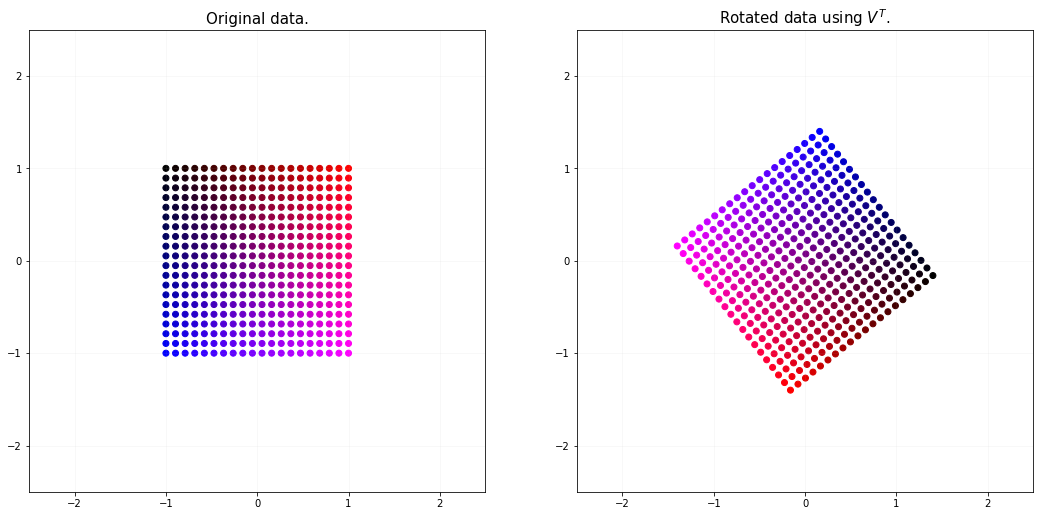

In [83]:
# Figure setup.
original = np.vstack([[i,j] for i in data for j in data]).T
colors = np.vstack([[i,0,j] for i in np.linspace(0,1,20) for j in np.linspace(1,0,20)])
fig,a = plt.subplots(1,2, figsize=(18,8.5))
plt.setp(a, xlim=(-scale/2,scale/2), ylim=(-scale/2,scale/2)); #to be moved to top
a[0].grid(alpha=.1);a[1].grid(alpha=.1);
a[0].set_title(r"Original data.", size = 15)
a[1].set_title(r"Rotated data using $V^{T}.$", size = 15)
# Figure setup.

# Transformation.
rotated = V.T @ original 
a[0].scatter(original[0], original[1], color=colors)
a[1].scatter(rotated[0],rotated[1], color=colors);
# Transformation.

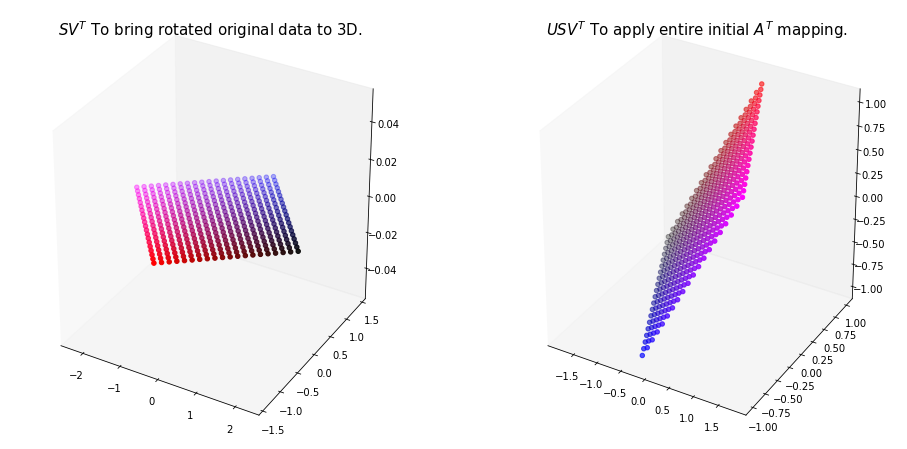

In [84]:
# Figure setup.
fig = plt.figure(figsize=plt.figaspect(0.5))
# scale3D = 2 # Excluding manual scaling for book similarity.
# ax.set_xlim3d(-scale3D,scale3D); ax.set_ylim3d(-scale3D,scale3D) ; ax.set_zlim3d(-scale3D,scale3D)
# Figure setup.

# Plotting 3D matrices.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid(b=None)
rotated3d = S @ V.T @ original
ax.scatter(rotated3d[0],rotated3d[1],rotated3d[2], color=colors)
ax.set_title(r"$SV^T$ To bring rotated original data to 3D.",size = 15)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid(b=None)
rotatedA = U @ S @ V.T @ original
ax.scatter(rotatedA[0],rotatedA[1],rotatedA[2], color=colors);
ax.set_title(r"$USV^T$ To apply entire initial $A^T$ mapping.",size = 15);
# Plotting 3D matrices.

## 4.5.2 Construction of the SVD
1. The SVD of symmetric positive definite, or SPD, matrices is their eigendecomposition..
1. Computing the SVD of an $m\times n$ is equivalent to finding orthonormal bases for U in $m\times m$, and V in $n\times n$.
1. A symmetric matrix possesses an orthonormal basis of eigenvectors, meaning it can be diagonalized. 
1. Given any rectangular matrix, we can always construct a symmetric, positive, semidefinite matrix $A^TA$. So $A^TA = PDP^T$. Here P is orthogonal, and composed of an orthonormal eigenbasis.
1. The SVD requires computing the right singular vectors $v_j$, singular values $\sigma_k$, and left singular vectors $u_i$.

In [85]:
A = np.vstack([[1,0,1],[-2,1,0]])
Matrix(A)

Matrix([
[ 1, 0, 1],
[-2, 1, 0]])

In [86]:
ATA = A.T @ A
Matrix(ATA)

Matrix([
[ 5, -2, 1],
[-2,  1, 0],
[ 1,  0, 1]])

In [87]:
vals, vecs = npl.eig(ATA)
D = np.eye(3) * np.sort(vals)[::-1] # Reordering because numpy eig does not necessarily order.
Matrix(D)
P = np.hstack([np.vstack(vecs[:,0]),np.vstack(vecs[:,2]),np.vstack(vecs[:,1])]) # Reordering because numpy eig does not necessarily order.
Matrix(P)
V = P.copy()

Matrix([
[6.0, 0.0,                   0.0],
[0.0, 1.0,                   0.0],
[0.0, 0.0, -4.44089209850063e-16]])

Matrix([
[ 0.912870929175277, 1.54074395550979e-33, -0.408248290463863],
[-0.365148371670111,    0.447213595499958, -0.816496580927726],
[ 0.182574185835055,    0.894427190999916,  0.408248290463863]])

In [88]:
# sqrt of D, with padded 0's to match shape of A
S = np.hstack([np.sqrt(D)[0:np.rank(A),:np.rank(A)],np.vstack([0,0])]) 
Matrix(S)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  


Matrix([
[2.44948974278318, 0.0, 0.0],
[             0.0, 1.0, 0.0]])

In [89]:
sigmas = np.sqrt(np.sort(vals)[::-1][:2])
vs = [np.vstack(V[:,0]),np.vstack(V[:,1])]
sigmas 
vs

array([2.44948974, 1.        ])

[array([[ 0.91287093],
        [-0.36514837],
        [ 0.18257419]]), array([[1.54074396e-33],
        [4.47213595e-01],
        [8.94427191e-01]])]

In [90]:
U = np.hstack([(1/i)*A@vs[ind] for ind,i in enumerate(sigmas)])
Matrix(U)

Matrix([
[ 0.447213595499958, 0.894427190999916],
[-0.894427190999916, 0.447213595499958]])

In [91]:
Matrix(A)
Matrix(U@S@V.T)

Matrix([
[ 1, 0, 1],
[-2, 1, 0]])

Matrix([
[ 1.0, 0.0,                   1.0],
[-2.0, 1.0, -5.55111512312578e-17]])

A note on the differences between the book example and the numpy implemention, `npl.svd`.
1. While `npl.eig` does not order, `npl.svd` does order.
1. S in numpy SVD is not reshaped or padded.
1. V in numpy SVD is already transposed. 

In [92]:
numU,numS,numV = npl.svd(A)
Matrix(numU)
Matrix(U)
Matrix(numS)
Matrix(S)
Matrix(numV)
Matrix(V)

Matrix([
[-0.447213595499958, 0.894427190999916],
[ 0.894427190999916, 0.447213595499958]])

Matrix([
[ 0.447213595499958, 0.894427190999916],
[-0.894427190999916, 0.447213595499958]])

Matrix([
[2.44948974278318],
[             1.0]])

Matrix([
[2.44948974278318, 0.0, 0.0],
[             0.0, 1.0, 0.0]])

Matrix([
[   -0.912870929175277,  0.365148371670111, -0.182574185835055],
[-3.88578058618805e-16,  0.447213595499958,  0.894427190999916],
[   -0.408248290463863, -0.816496580927726,  0.408248290463863]])

Matrix([
[ 0.912870929175277, 1.54074395550979e-33, -0.408248290463863],
[-0.365148371670111,    0.447213595499958, -0.816496580927726],
[ 0.182574185835055,    0.894427190999916,  0.408248290463863]])

In [93]:
Matrix(A)
Matrix(U@S@V.T)
Matrix(numU@np.hstack([np.eye(2)*numS,np.vstack([0,0])])@numV)

Matrix([
[ 1, 0, 1],
[-2, 1, 0]])

Matrix([
[ 1.0, 0.0,                   1.0],
[-2.0, 1.0, -5.55111512312578e-17]])

Matrix([
[ 1.0, 0.0,                  1.0],
[-2.0, 1.0, 1.11022302462516e-16]])

We can replicate this with the matrix from **Figure 4.9**.

In [94]:
A = np.vstack([[1,-.8],[0,1],[1,0]])
Matrix(A)
U = np.vstack([[-.79,0,-.62],[.38,-.78,-.49],[-.48,-.62,.62]])
S = np.vstack([[1.62,0],[0,1.0],[0,0]])
V = np.vstack([[-.78,-.62],[.62,-.78]])
Matrix(U)
Matrix(S)
Matrix(V.T)

Matrix([
[1.0, -0.8],
[0.0,  1.0],
[1.0,  0.0]])

Matrix([
[-0.79,   0.0, -0.62],
[ 0.38, -0.78, -0.49],
[-0.48, -0.62,  0.62]])

Matrix([
[1.62, 0.0],
[ 0.0, 1.0],
[ 0.0, 0.0]])

Matrix([
[-0.78,  0.62],
[-0.62, -0.78]])

Steps:
1. $V_{cols}$ = eigenvectors(ATA), check for ordering
1. $U_{cols}$ = eigenvectors(AAT), check for ordering
1. $S_{i,i}$ = sqrt(sort(eigenalues(AAT or ATA) if $\neq 0$)))) 

In [95]:
npl.eig(A@A.T)
npl.eig(A.T@A)

(array([ 2.64000000e+00, -2.22044605e-16,  1.00000000e+00]),
 array([[ 0.78817011, -0.61545745,  0.        ],
        [-0.38447322, -0.49236596,  0.78086881],
        [ 0.48059153,  0.61545745,  0.62469505]]))

(array([2.64, 1.  ]), array([[ 0.78086881,  0.62469505],
        [-0.62469505,  0.78086881]]))

In [96]:
numU = npl.eig(A@A.T)[1]
numU = np.hstack([np.vstack(numU[:,0]),np.vstack(numU[:,2]),np.vstack(numU[:,1])])
numS = np.vstack([np.eye(2)*[i for i in np.sqrt(np.sort(npl.eig(A.T@A)[0])[::-1]) if np.isnan(i) == False],[0,0]])
numV = npl.eig(A.T@A)[1]
numU
numS
numV.T

array([[ 0.78817011,  0.        , -0.61545745],
       [-0.38447322,  0.78086881, -0.49236596],
       [ 0.48059153,  0.62469505,  0.61545745]])

array([[1.62480768, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

array([[ 0.78086881, -0.62469505],
       [ 0.62469505,  0.78086881]])

We can check the $U\Sigma V^{T}$ result.

In [97]:
A
numU@numS@numV.T

array([[ 1. , -0.8],
       [ 0. ,  1. ],
       [ 1. ,  0. ]])

array([[ 1.00000000e+00, -8.00000000e-01],
       [-1.11022302e-16,  1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00]])

We can again compare with `npl.svd`, to find the same idiosyncracies noted above.
1. While `npl.eig` does not order, `npl.svd` does order.
1. S in numpy SVD is not reshaped or padded.
1. V in numpy SVD is already transposed. 

In [98]:
npl.svd(A)

(array([[-7.88170109e-01,  1.66533454e-16, -6.15457455e-01],
        [ 3.84473224e-01, -7.80868809e-01, -4.92365964e-01],
        [-4.80591530e-01, -6.24695048e-01,  6.15457455e-01]]),
 array([1.62480768, 1.        ]),
 array([[-0.78086881,  0.62469505],
        [-0.62469505, -0.78086881]]))

## 4.5.3 Eigenvalue Decomposition vs Singular Value Decomposition
Similarities:
1. Change of basis in the domain.
1. Independent scaling of each new basis from domain to codomain.
1. Change of basis in the codomain.

Differences:
1. Generally U and V are not inverses of each other.
1. S is generally real, whereas entries in D are not usually.

*If m = n, SVD = Eigendecomposition.*
### Example 4.14 (Finding Structure in Movie Ratings and Consumers)
#### Figure 4.10 
*Movie ratings by three people for four movies and its SVD decomposition*.

In [99]:
A = np.vstack([[5,4,1],[5,5,0],[0,0,5],[1,0,4]])
Matrix(A)

Matrix([
[5, 4, 1],
[5, 5, 0],
[0, 0, 5],
[1, 0, 4]])

In [100]:
U,S,V = npl.svd(A) 
S = np.vstack([np.eye(3)*S.copy(),[0,0,0]])
U
S
V
U@S@V

array([[-0.67096878,  0.02362898,  0.46466034, -0.57735027],
       [-0.7197425 ,  0.20541998, -0.47585716,  0.46188022],
       [-0.09389374, -0.77048084, -0.52682373, -0.34641016],
       [-0.15151103, -0.6029955 ,  0.52925183,  0.57735027]])

array([[9.6438109 , 0.        , 0.        ],
       [0.        , 6.36389089, 0.        ],
       [0.        , 0.        , 0.70555232],
       [0.        , 0.        , 0.        ]])

array([[-0.73674894, -0.65146317, -0.1810987 ],
       [ 0.0852072 ,  0.17624687, -0.9806512 ],
       [ 0.67077622, -0.73792464, -0.07434034]])

array([[ 5.00000000e+00,  4.00000000e+00,  1.00000000e+00],
       [ 5.00000000e+00,  5.00000000e+00, -3.23583665e-16],
       [ 4.66153579e-17, -1.93549384e-16,  5.00000000e+00],
       [ 1.00000000e+00, -3.23524196e-16,  4.00000000e+00]])

*Note: Implementing this a layer of abstraction below `npl.svd` with `npl.eig` is tricky because eigenvectors are calculated with a 4th, negative 0 eigenvalue. This is an instance where, `npl.svd` is safer to use.* 

The decomposition can be interpreted in terms of large absolute values. $U_1$ has large absolute values for two science fiction movies, and it's corresponding singular value in $S_1$ is also large. This indicates a grouping of movies, and of people. Also, $V_1$ has large absolute values, indicating a grouping among people.

An SVD of a set of movies and a set of people can be decomposed and represented as groups using SVD.

Full SVD:
1. $A$ = $U\Sigma V$.
1. $A$ is $m\times n$.
1. $U$ is $m\times m$.
1. $\Sigma$ is $m\times n$.
1. $V$ is $n\times n$.

Reduced SVD:
1. $A$ = $U\Sigma V$.
1. $A$ is $m\times n$.
1. $U$ is $m\times n$.
1. $\Sigma$ is $n\times n$.
1. $V$ is $n\times n$.

## 4.6 Matrix Approximation

Matrices can be approximated as lower-quality versions of themselves using SVD. By taking the sum of some amount of columns in U, that same amount of rows in V, and scaling them by that same amount of singular values in S, you can get increasingly accurate approximations of S. This takes advantage of the value of singular values decreasing.

First we start by importing an image, converting it to greyscale, and converting that to a `numpy` array.

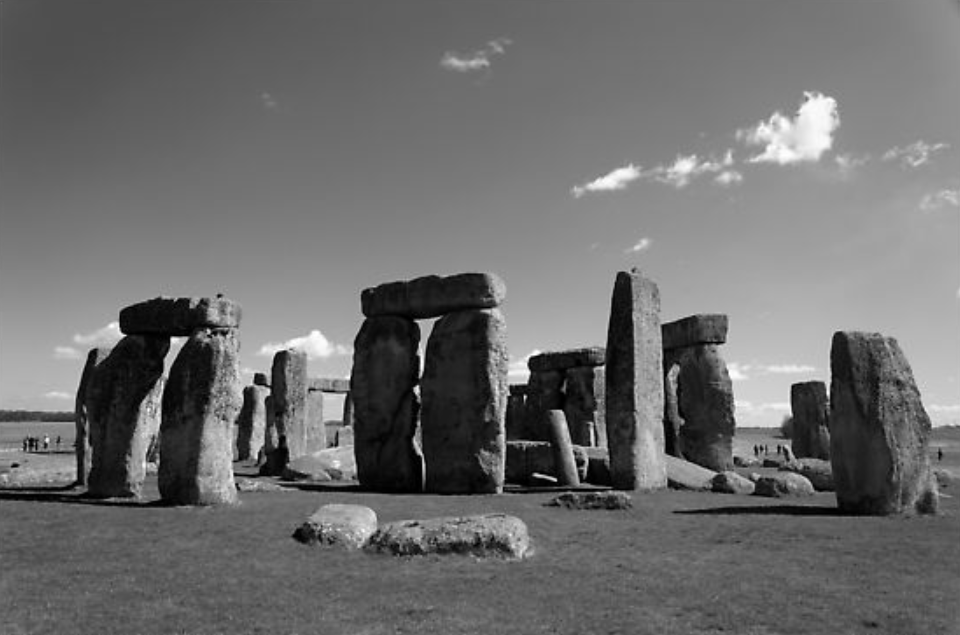

'PNG'

(960, 635)

'RGBA'

In [101]:
stonehenge = Image.open('qtluong.png')
stonehenge
stonehenge.format
stonehenge.size
stonehenge.mode

In [102]:
gsMatrix = np.array(stonehenge.convert("L"))/255 # Conversion to a greyscale, numpy array, with values 0-1.
np.shape(gsMatrix)
gsMatrix

(635, 960)

array([[0.35294118, 0.34509804, 0.3372549 , ..., 0.48627451, 0.46666667,
        0.48627451],
       [0.32156863, 0.32941176, 0.31372549, ..., 0.47843137, 0.45098039,
        0.4627451 ],
       [0.34117647, 0.37647059, 0.34117647, ..., 0.49019608, 0.47058824,
        0.47058824],
       ...,
       [0.41568627, 0.41568627, 0.41960784, ..., 0.39215686, 0.39215686,
        0.4       ],
       [0.42352941, 0.43137255, 0.42745098, ..., 0.38431373, 0.39607843,
        0.4       ],
       [0.43137255, 0.45098039, 0.42745098, ..., 0.37254902, 0.39607843,
        0.39607843]])

((635, 635), (635, 960), (960, 960))

True

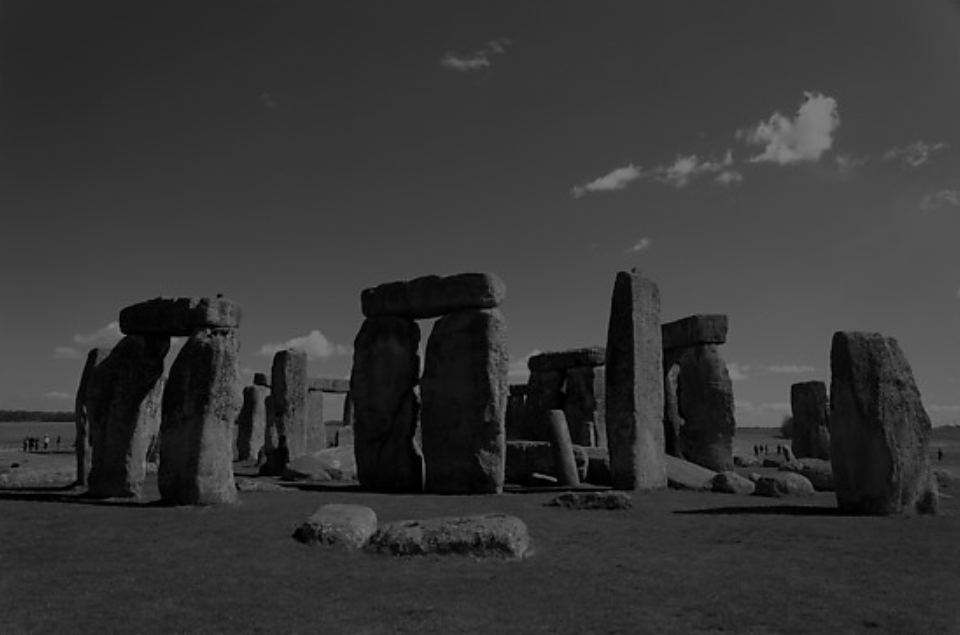

In [103]:
scalar = 1/2 # Testing reconstruction of image.
shape = np.shape(gsMatrix)
U,S,V = npl.svd(gsMatrix) 
Sd = np.hstack([np.eye(shape[0])*S.copy(),np.zeros((shape[0],shape[1]-shape[0]))])
np.shape(U),np.shape(Sd),np.shape(V)
np.allclose(gsMatrix,U@Sd@V)
Image.fromarray((U@Sd@V*255*scalar).astype('uint8'))

#### Figure 4.11
Every step of summation for approximating a matrix is decreasingly rich in information about the original matrix trying to be approximated. The image created by each step of summation is gridlike because of the outer-product being taken between the left and right-singular vectors, $u_i, v_i$.

(635, 1)

(1, 1)

(1, 960)

(2, [(635, 960), (635, 635), (635, 960), (960, 960)])

(1596, 609600, 0.0026181102362204723)

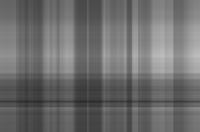

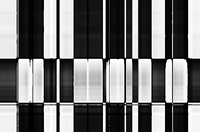

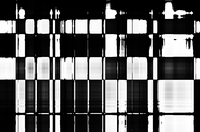

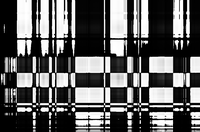

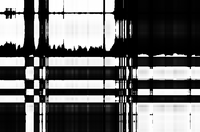

In [104]:
k = 1
np.shape(U[:,:k])
np.shape(np.diag(S[:k]))
np.shape(V.T[:,:k].T)
m,n = np.shape(gsMatrix)
partial,total = k*(m+n)+k, m*n 
np.ndim(gsMatrix),[np.shape(i) for i in [gsMatrix,U,Sd,V]]
partial,total, partial/total

size = (200,200)
imtemp = lambda k: (np.vstack(U[:,k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    im

#### Figure 4.12
Reconstruction of the original is shown using low-rank approximation of the SVD, where the rank-k approximation is given by the sum of the scaled outer product between u and v.

(5, 5)

(635, 5)

(5, 960)

(2, [(635, 960), (635, 635), (635, 960), (960, 960)])

(7980, 609600, 0.013090551181102363)

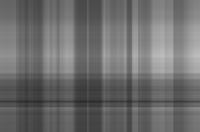

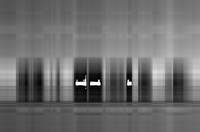

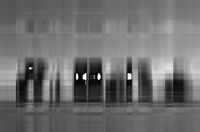

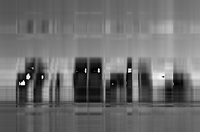

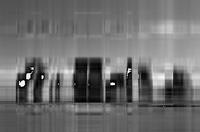

In [105]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:,:quality])
np.shape(V[:quality,:])
k = quality
m,n = np.shape(gsMatrix)
partial,total = k*(m+n)+k, m*n 
np.ndim(gsMatrix),[np.shape(i) for i in [gsMatrix,U,Sd,V]]
partial,total, partial/total

imtemp = lambda k: (U[:,:k]@np.diag(S[:k])@V.T[:,:k].T)*255 # V[:k,:] also works
for i in list(range(1,k+1)):
    im = Image.fromarray(imtemp(i).astype('uint8'))
    im.thumbnail(size, Image.ANTIALIAS)
    im

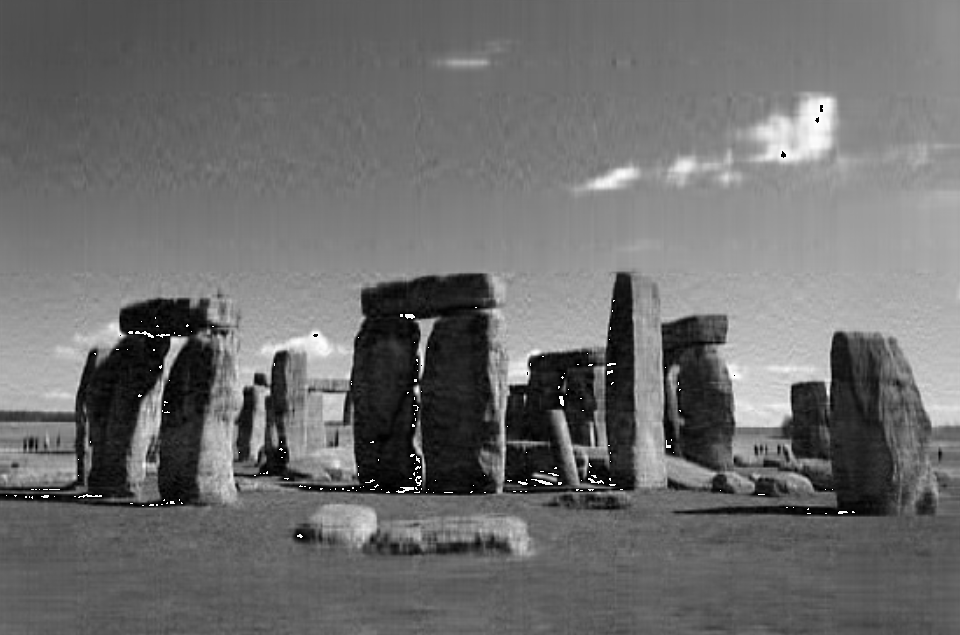

(79800, 609600, 0.1309055118110236)

In [106]:
k = 50
Image.fromarray(imtemp(k).astype('uint8')) # An approximation at rank 50. 
m,n = np.shape(gsMatrix)
partial,total = (k*(m+n)+k, m*n)
partial,total, partial/total

Note the calculations that were added along the way for data storage proportion. The approximation at rank 50, above, is $13.09\%$ of the original. Also note that at some point the storage exceeds the original, which is a reminder that this is expressly meant for low-rank approximation.

We can also measure how much error exists between the approximation and the original. 

In [107]:
A = gsMatrix
k = 5
aHat = imtemp(k)/255
A
aHat
npl.norm(A)
S[0]
npl.norm(A-aHat)
S[k+1] # The Eckart-Young theorem not holding here 100%, will have to debug later.

array([[0.35294118, 0.34509804, 0.3372549 , ..., 0.48627451, 0.46666667,
        0.48627451],
       [0.32156863, 0.32941176, 0.31372549, ..., 0.47843137, 0.45098039,
        0.4627451 ],
       [0.34117647, 0.37647059, 0.34117647, ..., 0.49019608, 0.47058824,
        0.47058824],
       ...,
       [0.41568627, 0.41568627, 0.41960784, ..., 0.39215686, 0.39215686,
        0.4       ],
       [0.42352941, 0.43137255, 0.42745098, ..., 0.38431373, 0.39607843,
        0.4       ],
       [0.43137255, 0.45098039, 0.42745098, ..., 0.37254902, 0.39607843,
        0.39607843]])

array([[0.32632101, 0.32866196, 0.32678015, ..., 0.4785917 , 0.47714393,
        0.47964494],
       [0.3274938 , 0.32978068, 0.32787427, ..., 0.47832083, 0.47690242,
        0.47931358],
       [0.32701555, 0.32934538, 0.32745455, ..., 0.47894579, 0.47749787,
        0.47997791],
       ...,
       [0.34377147, 0.34391171, 0.34171506, ..., 0.3876273 , 0.38700568,
        0.38743425],
       [0.34709101, 0.34725176, 0.34506138, ..., 0.39483198, 0.39418907,
        0.39451986],
       [0.34891987, 0.34914659, 0.34698399, ..., 0.40069038, 0.39999095,
        0.40033005]])

362.4598423288263

343.9808241988276

63.702681727341655

20.729271947024568

### Example 4.15 (Finding Structure in Movie Ratings and Consumers (continued))

In [108]:
# Recall move rating data:
A = np.vstack([[5,4,1],[5,5,0],[0,0,5],[1,0,4]])
Matrix(A)

Matrix([
[5, 4, 1],
[5, 5, 0],
[0, 0, 5],
[1, 0, 4]])

In [109]:
U,S,V = npl.svd(A)
Matrix(U)
Matrix(S)
Matrix(V)

Matrix([
[ -0.670968784133559, 0.0236289846199739,  0.464660336666289, -0.577350269189626],
[ -0.719742497550142,  0.205419981431847, -0.475857158310654,    0.4618802153517],
[-0.0938937434833601, -0.770480839571349, -0.526823728383706, -0.346410161513776],
[ -0.151511032183462, -0.602995504268313,  0.529251826284587,  0.577350269189626]])

Matrix([
[ 9.64381090011831],
[ 6.36389088878754],
[0.705552321494398]])

Matrix([
[-0.736748938172854, -0.651463170457632,  -0.181098701371548],
[0.0852072003538231,  0.176246869287984,  -0.980651198986697],
[ 0.670776218353807, -0.737924642902969, -0.0743403409158917]])

In [110]:
k = 1
A1 = np.dot(np.vstack(U[:,k-1]),np.array([V[k-1]])) 
np.shape(V[k-1]), np.shape(np.array([V[k-1]])) # Note this trick, also used above, to turn the V column into shape (1,3), rather than (3,).
Matrix(A1)

((3,), (1, 3))

Matrix([
[ 0.494335539257531,  0.437111451389751,  0.121511575467434],
[ 0.530269520827945,   0.46888572936711,  0.130344431628245],
[0.0691761158124399, 0.0611683158158054, 0.0170040350117498],
[ 0.111625592082639, 0.0987038573855465, 0.0274384511718878]])

The significant values, $>.4$, show a grouping of movies, and of people. But no other groupings. 

In [111]:
k = 2
A2 = np.dot(np.vstack(U[:,k-1]),np.array([V[k-1]])) 
np.shape(V[k-1]), np.shape(np.array([V[k-1]])) # Note this trick, also used above, to turn the V column into shape (1,3), rather than (3,).
Matrix(A2)

((3,), (1, 3))

Matrix([
[0.00201335962667152, 0.00416453456372432, -0.0231717920984157],
[  0.017503261514542,  0.0362046286165587,  -0.201445351086966],
[-0.0656505152661378,  -0.135794835820828,   0.755572959121921],
[-0.0513795587446447,  -0.106276069822019,   0.591328264244309]])

The significant values here, show us data not found in the first. So, it is useful to combine and create $\hat{A}(2)$.

In [112]:
S[0]*A1+S[1]*A2
A

array([[ 4.78009126,  4.24192282,  1.0243719 ],
       [ 5.22520783,  4.75224761, -0.02495918],
       [ 0.24932866, -0.27428785,  4.97236757],
       [ 0.7495222 ,  0.27555202,  4.02775979]])

array([[5, 4, 1],
       [5, 5, 0],
       [0, 0, 5],
       [1, 0, 4]])

In [113]:
npl.norm(S[0]*A1+S[1]*A2-A)
S[2] # Eckart-Young worked here! :D Maybe a matter of significant values. 

0.7055523214943982

0.7055523214943981

The similarity between $\hat{A}(2)$ and A, indicates that the entire space has been covered, and is two dimensional. 

## 4.7 Matrix Phylogeny
#### Figure 4.13 
*Book provides a "phylogeny" or "mind map", of matrices.* This section is a recap of all the matrices encountered so far. 
## 4.8 Further Reading